In [1]:
# Import data and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
#from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
#pd.options.display.mpl_style = 'default'
matplotlib.style.use('ggplot') # for pandas version 17
#get_ipython().magic(u'matplotlib inline')
import sys 
sys.path.append('../Bmore/2015')
#import ibuttonplots
#import importibuttondata
pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 14
pylab.rcParams['axes.titlesize'] = 22

# ### Use this to read in reformated data 
# tempDF = pd.read_csv('NairobiSensors.csv', parse_dates = [0]).set_index('Date')
# tempDF.columns = tempDF.columns.astype(int)
# meta = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
# meta = meta.set_index(meta['sensornumber'])

# availablesensors = np.intersect1d(meta.index, tempDF.columns)
# meta = meta.loc[availablesensors]
# tempDF = tempDF[availablesensors]

In [2]:
### Use this to read in reformated data 
tempDF = pd.read_csv('data/CleanedNairobiTemperature.csv', parse_dates = [0]).set_index('Date')
tempDF.columns = tempDF.columns.astype(int)
meta = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
meta = meta.set_index(meta['sensornumber'])

rhDF = pd.read_csv('data/CleanedNairobiHumidity.csv', parse_dates = [0]).set_index('Date')
rhDF.columns = rhDF.columns.astype(int)

availablesensors = np.intersect1d(meta.index, tempDF.columns)
meta = meta.loc[availablesensors]
tempDF = tempDF[availablesensors]
startdate = '2015-12-04'
enddate = '2016-02-21'

In [ ]:
# #rename files
# files = glob.glob('./data/Temp_sensor*.csv')
# for file in files: 
#     sensorNum = os.path.basename(os.path.splitext(file)[0]).split('r')[1]
#     os.rename(file,  './data/'+ sensorNum+'T.csv')

# files = glob.glob('./data/RH_sensor*.csv')
# for file in files: 
#     sensorNum = os.path.basename(os.path.splitext(file)[0]).split('r')[1]
#     os.rename(file,  './data/'+sensorNum+'H.csv')
    
# files = glob.glob('./data/*T.csv')
# meta0 = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
# tempDF, meta = importibuttondata.importdata(files, meta0)
# #tempDF = tempDF[meta.index] # sort the data in order because otherwise it's annoying

# #adjust index to Nairobi local time, as I set some iButtons on local time
# ind = [1,2,17,22,36,37,38,39,40,41,42,43,44,45,46,48,50]
# #to_be_adjusted = np.setdiff1d(tempDF.columns, ind)
# to_be_adjusted =[3, 8, 9, 10, 11, 13, 18, 21, 23, 25, 27, 29, 30, 31, 32, 33]
# tempDF0 = tempDF[ind]
# tempDF1 = tempDF[to_be_adjusted]
# tempDF1.index = tempDF1.index + pd.DateOffset(hours = 8)
# tempDF = pd.concat([tempDF0,tempDF1])
# date_spec = {'Date': [ 0]}
# frames = []
# N = [1, 2, 4, 5, 12, 16, 17, 19, 20, 22, 24, 26, 34, 35] #files with date indexes starting before Nov. 11, 2015   
# #N = [1, 2, 4, 5, 12, 16, 17, 19, 20, 22, 24, 34, 35] #files with date indexes starting before Nov. 11, 2015 
# for n in N:
#     try: 
#         file = glob.glob('./data/%sT.csv'%n)[0]
#         frame = pd.read_csv(file, sep = ',',
#                             skiprows = 19,
#                             parse_dates = date_spec,
#                             keep_date_col=True)
#         frame = frame.set_index('Date').rename(columns = {'Value': n})
#         frames.append(frame)
#     except IndexError: 
#         print 'Sensor %s is not available'%n
# testDF = pd.concat(frames, axis =1).resample('H')
# testDF.index = testDF.index + pd.DateOffset(days = 87, hours = 11)

# keep = np.setdiff1d(tempDF.columns, N) # Columns that don't need reimporting
# tempDF = pd.concat([tempDF[keep], testDF])
# tempDF.resample('H').to_csv('NairobiSensors.csv')

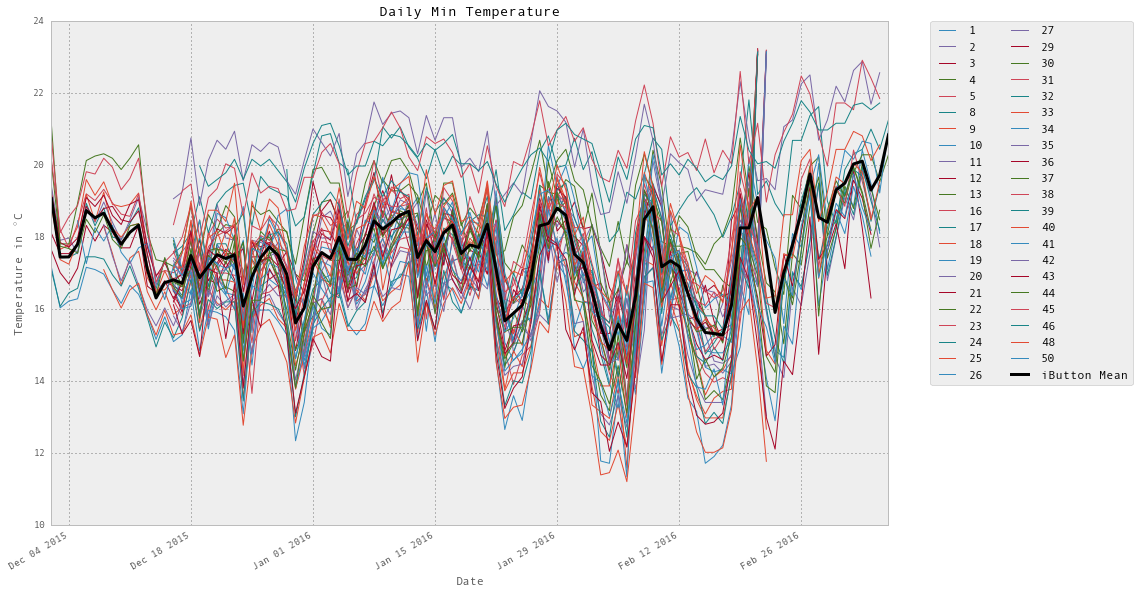

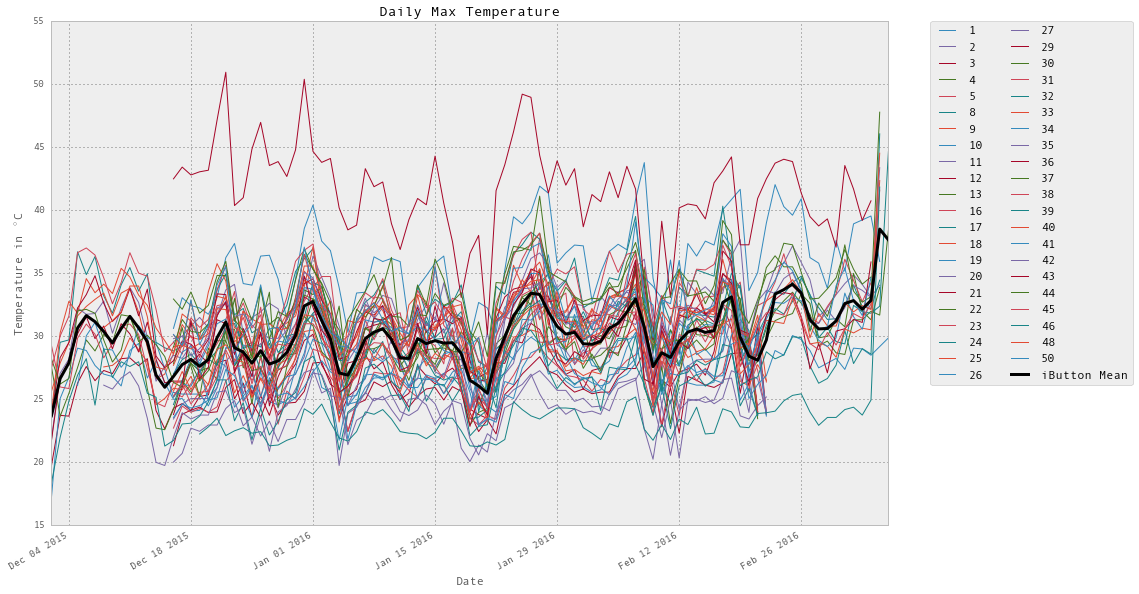

In [153]:
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(tempDF.resample('D', how= 'min').index, tempDF.resample('D', how= 'min')[column], label= column)

tempDF.resample('D', how= 'min').mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Min Temperature')
plt.ylabel('Temperature in $^\circ $C')

fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(tempDF.resample('D', how= 'max').index, tempDF.resample('D', how= 'max')[column], label= column)

tempDF.resample('D', how= 'max').mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Max Temperature')
plt.ylabel('Temperature in $^\circ $C')

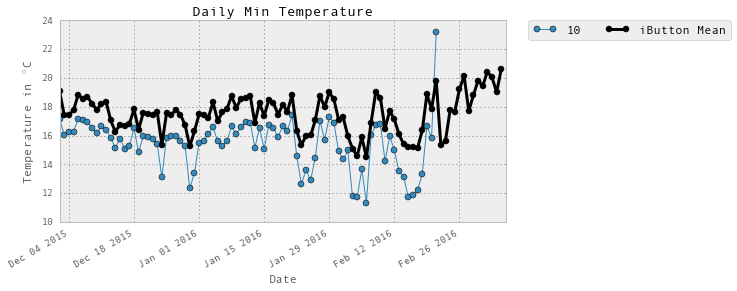

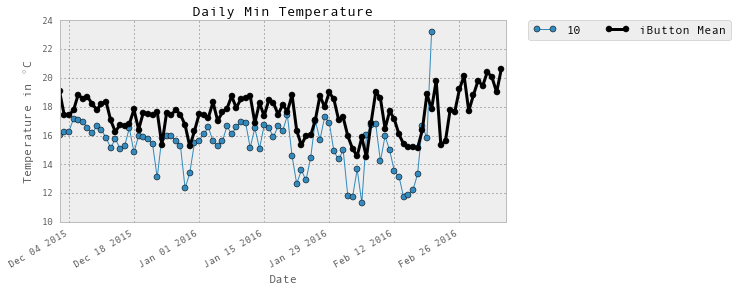

In [14]:
figure = plt.figure(figsize=[8,4])
column = 10
plt.plot(tempDF.resample('D', how= 'min').index, tempDF.resample('D', how= 'min')[column], '-o', label= column)
tempDF.resample('D', how= 'min').mean(axis=1).plot(style = '-ok', label = 'iButton Mean', linewidth = 3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Min Temperature')
plt.ylabel('Temperature in $^\circ $C')

figure = plt.figure(figsize=[8,4])
column = 10
plt.plot(tempDF.resample('D', how= 'min').index[0:-1], tempDF.resample('D', how= 'min')[column][1:], '-o', label= column)
tempDF.resample('D', how= 'min').mean(axis=1).plot(style = '-ok', label = 'iButton Mean', linewidth = 3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Min Temperature')
plt.ylabel('Temperature in $^\circ $C')

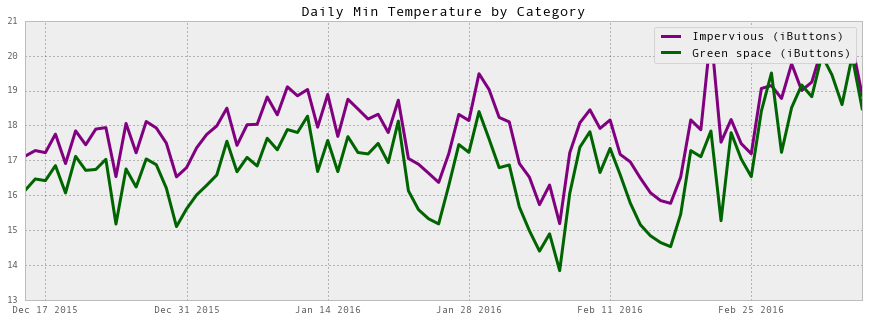

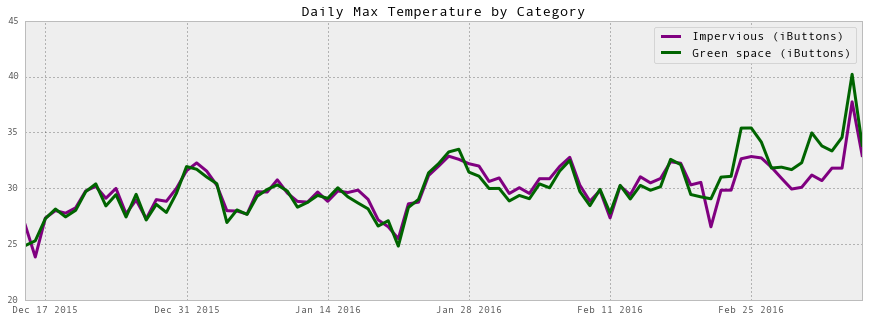

In [137]:
startdate = '2015-12-15'
enddate = '2016-03-07'
impervious = meta.sensornumber.iloc[np.where(meta['landcoverclass'] == 'impervious')]
parks = meta.sensornumber.iloc[np.where(meta['landcoverclass'] != 'impervious')]
plt.figure(figsize=[15,5])
plt.plot(tempDF[startdate:enddate].resample('D',how = 'min').index, 
         tempDF[startdate:enddate].resample('D', how = 'min')[impervious].mean(axis=1), 
         #color =  pd.tools.plotting._get_standard_colors(3)[1], 
         color = 'purple',
         label = 'Impervious (iButtons)', linewidth = 3)

plt.plot(tempDF[startdate:enddate].resample('D', how = 'min').index, 
         tempDF[startdate:enddate].resample('D', how = 'min')[parks].mean(axis=1), 
         'DarkGreen',
         #'-o', 
         label = 'Green space (iButtons)', linewidth = 3)
plt.legend()
plt.title('Daily Min Temperature by Category')

plt.figure(figsize=[15,5])
plt.plot(tempDF[startdate:enddate].resample('D',how = 'min').index, 
         tempDF[startdate:enddate].resample('D', how = 'max')[impervious].mean(axis=1), 
         #color =  pd.tools.plotting._get_standard_colors(3)[1], 
         color = 'purple',
         label = 'Impervious (iButtons)', linewidth = 3)

plt.plot(tempDF[startdate:enddate].resample('D', how = 'min').index, 
         tempDF[startdate:enddate].resample('D', how = 'max')[parks].mean(axis=1), 
         'DarkGreen',
         #'-o', 
         label = 'Green space (iButtons)', linewidth = 3)
plt.legend()
plt.title('Daily Max Temperature by Category')

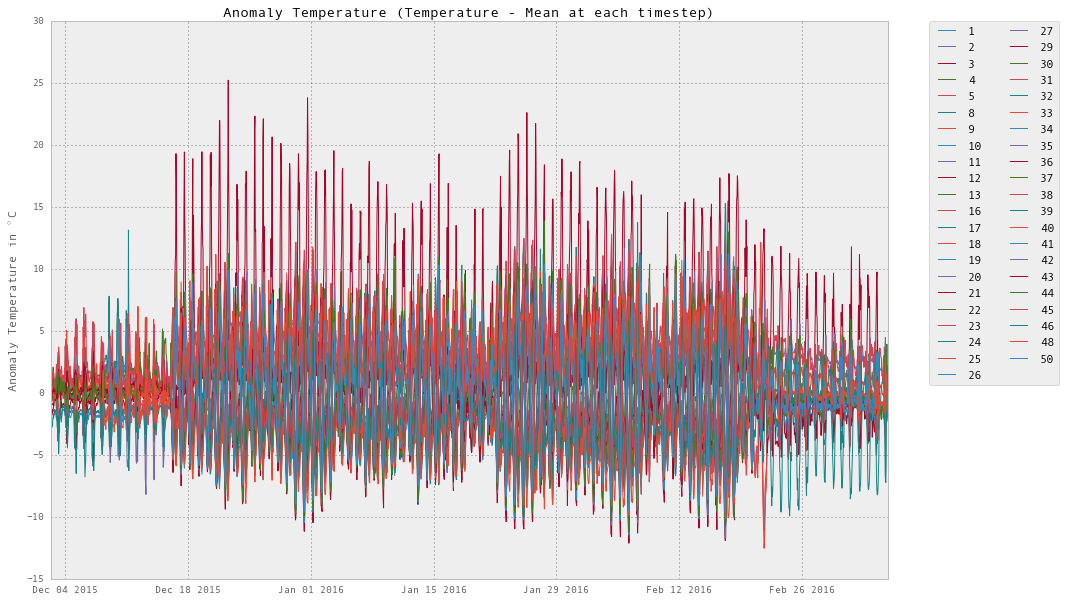

In [154]:
# plot anomaly 
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(anomalyDF.index, anomalyDF[column], label= column)
#anomalyDF.std(axis=1).plot(style = 'black', alpha = .5, linewidth = 3, label = '+$sigma$')
#(anomalyDF.std(axis=1)*-1).plot(style = 'black', alpha = .5, linewidth = 3, label = '- $\sigma$')
#observations.urban.subtract(observations.rural).plot(style = 'or', label = 'U-R', markersize = 8)

plt.title('Anomaly Temperature (Temperature - Mean at each timestep)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 2)
plt.ylabel('Anomaly Temperature in $^\circ $C')

ValueError: x and y must have same first dimension

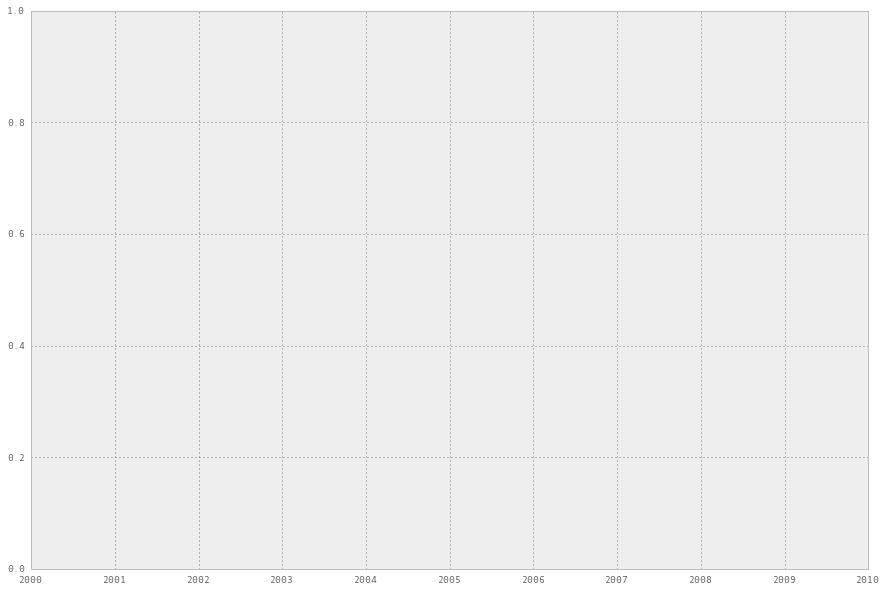

In [155]:
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(anomalyDF.resample('D', how= 'min').index, tempDF.resample('D', how= 'min')[column], label= column)

tempDF.resample('D', how= 'min').mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Min Temperature')
plt.ylabel('Temperature in $^\circ $C')

fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(tempDF.resample('D', how= 'max').index, tempDF.resample('D', how= 'max')[column], label= column)

tempDF.resample('D', how= 'max').mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Max Temperature')
plt.ylabel('Temperature in $^\circ $C')

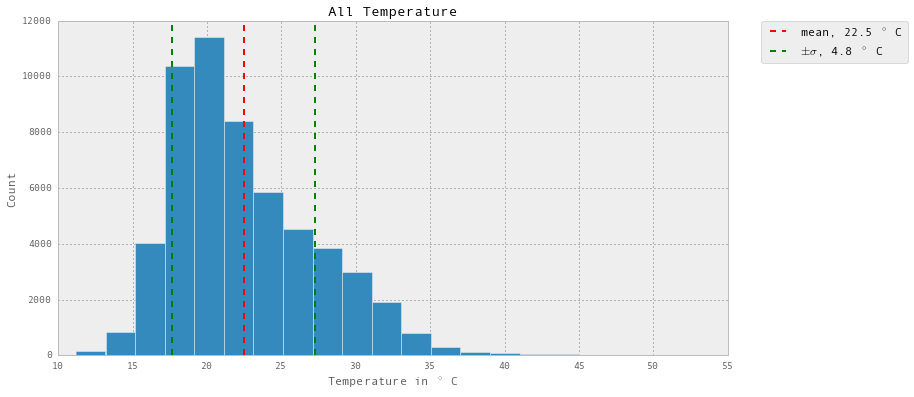

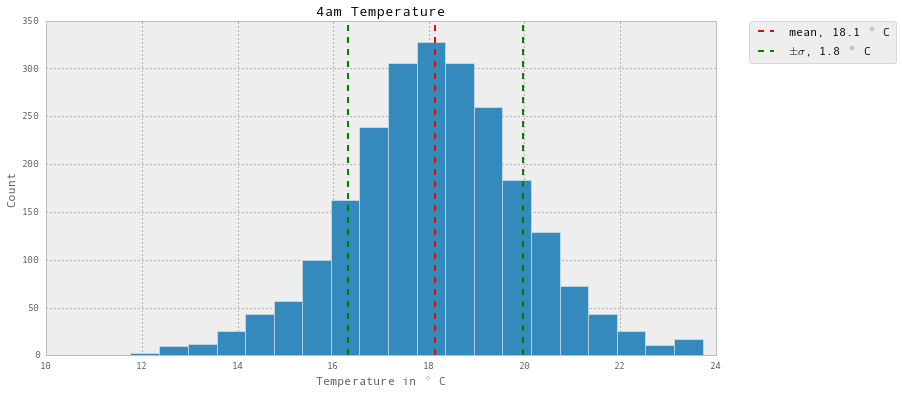

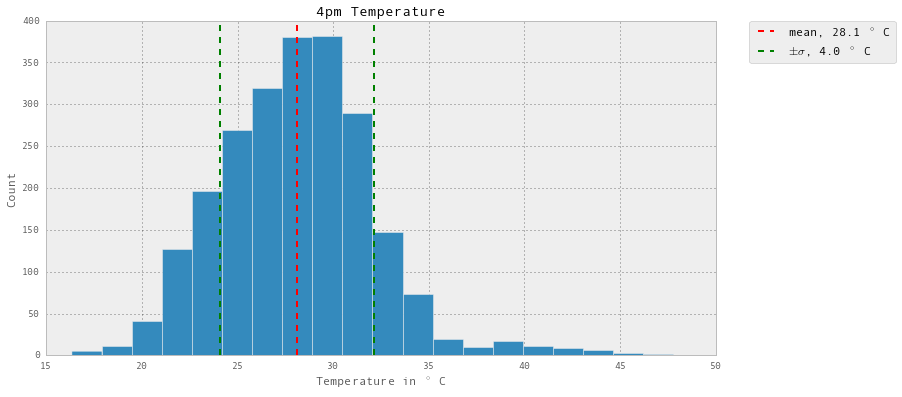

In [81]:
ibuttonplots.histPlot(tempDF, 'All Temperature')
h1, bins1 = ibuttonplots.histPlot(tempDF[tempDF.index.hour == 4], '4am Temperature')
h2, bins2 = ibuttonplots.histPlot(tempDF[tempDF.index.hour == 16], '4pm Temperature')

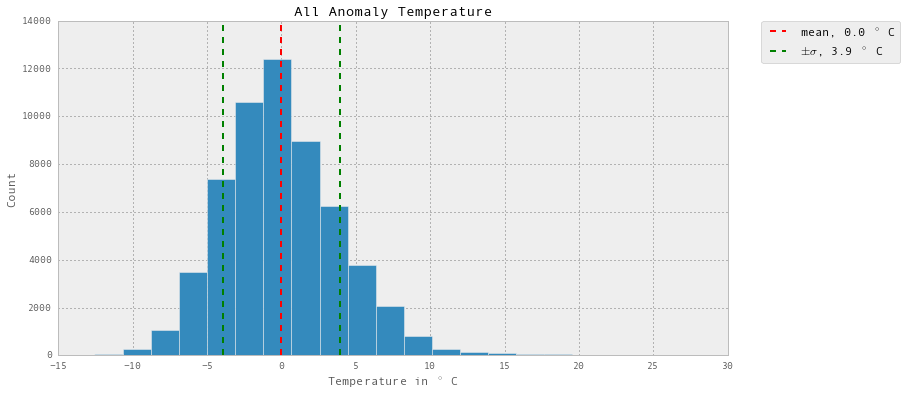

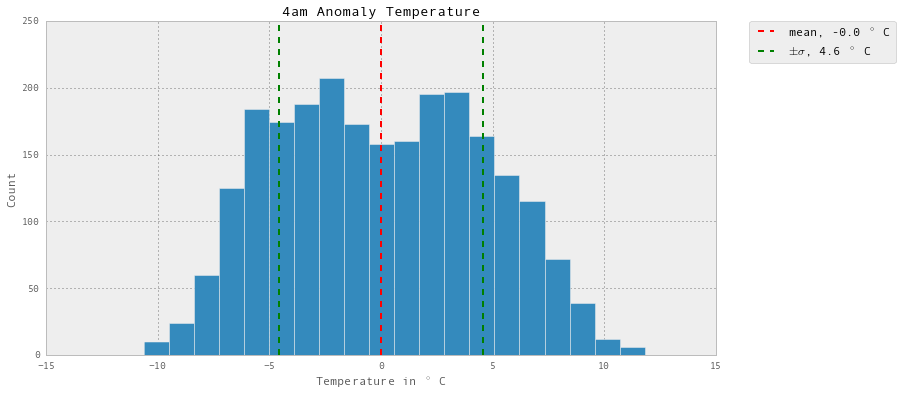

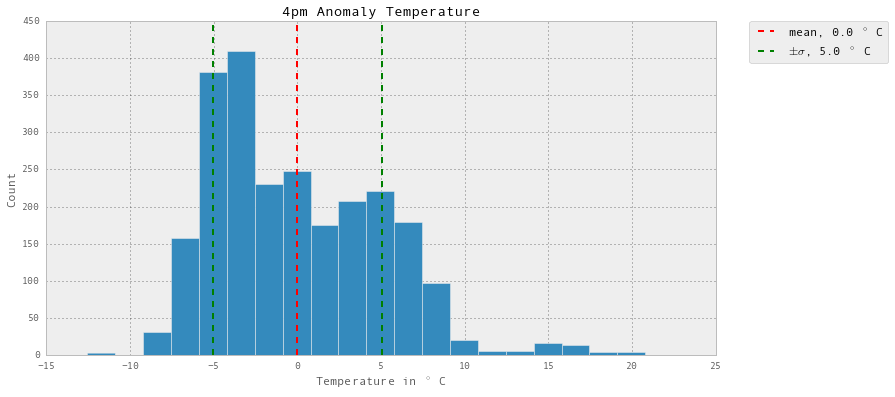

In [156]:
ibuttonplots.histPlot(anomalyDF, 'All Anomaly Temperature')
h1, bins1 = ibuttonplots.histPlot(anomalyDF[anomalyDF.index.hour == 4], '4am Anomaly Temperature')
h2, bins2 = ibuttonplots.histPlot(anomalyDF[anomalyDF.index.hour == 16], '4pm Anomaly Temperature')

In [157]:
fig  = plt.figure(figsize=(12, 6))
diff = tempDF[tempDF.index.hour == 16][:-1].values - tempDF[tempDF.index.hour == 4].values
data = diff[~np.isnan(diff)]
n, bins, patches = plt.hist(data, 20)

plt.axvline(data.mean(),
                linestyle='dashed',
                color = pd.tools.plotting._get_standard_colors(3)[2],
                linewidth=2,
                label = 'mean, %2.1f $^\circ$ C'%np.nanmean(data),
                alpha = 1.0)

plt.axvline(data.std()+data.mean(),
                color = pd.tools.plotting._get_standard_colors(3)[1],
                linestyle='dashed',
                linewidth=2,
                label = '$\pm \sigma$, %2.1f $^\circ$ C'%np.nanstd(data)
                )

plt.axvline(data.mean()-data.std(),
                color = pd.tools.plotting._get_standard_colors(3)[1],
                linestyle='dashed',
                linewidth=2,
                )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #, ncol = 3)

plt.title('4pm - 4am Temp. Diff')
plt.xlabel('Temperature in $^\circ$ C')
plt.ylabel('Count')

ValueError: operands could not be broadcast together with shapes (285,43) (283,43) 

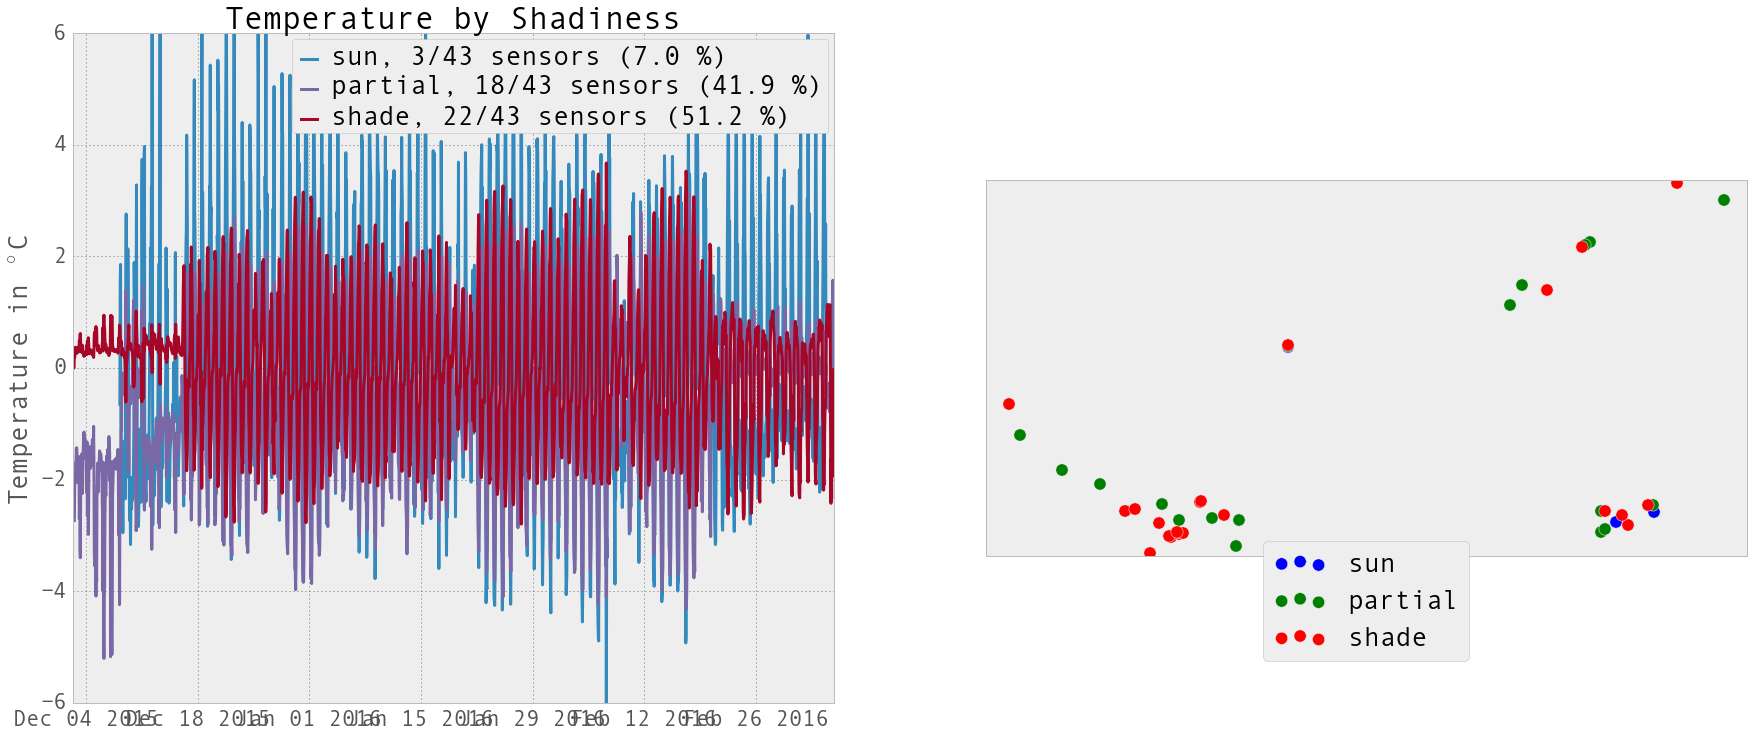

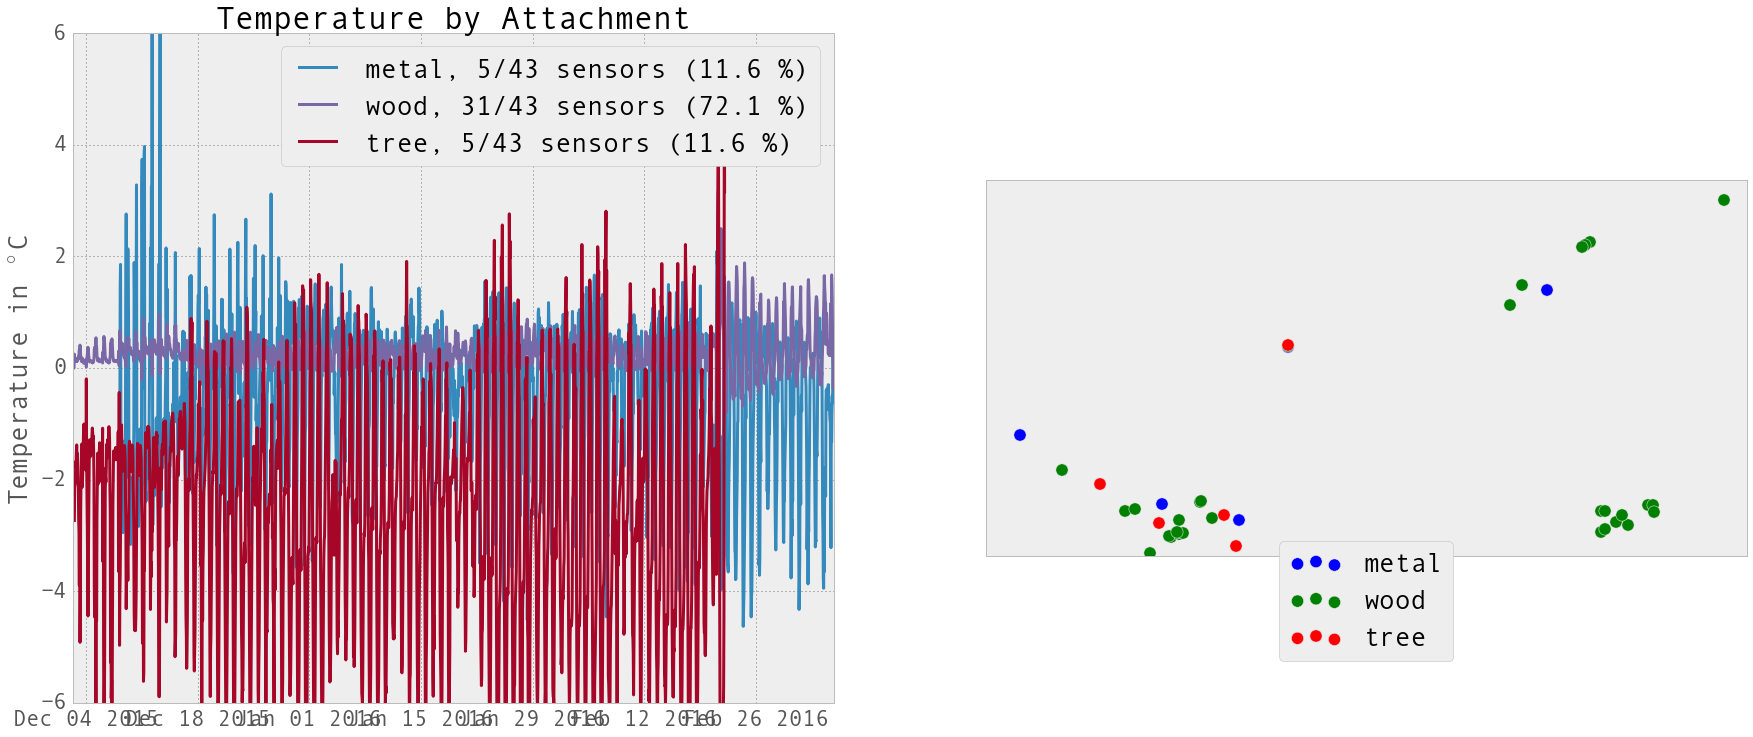

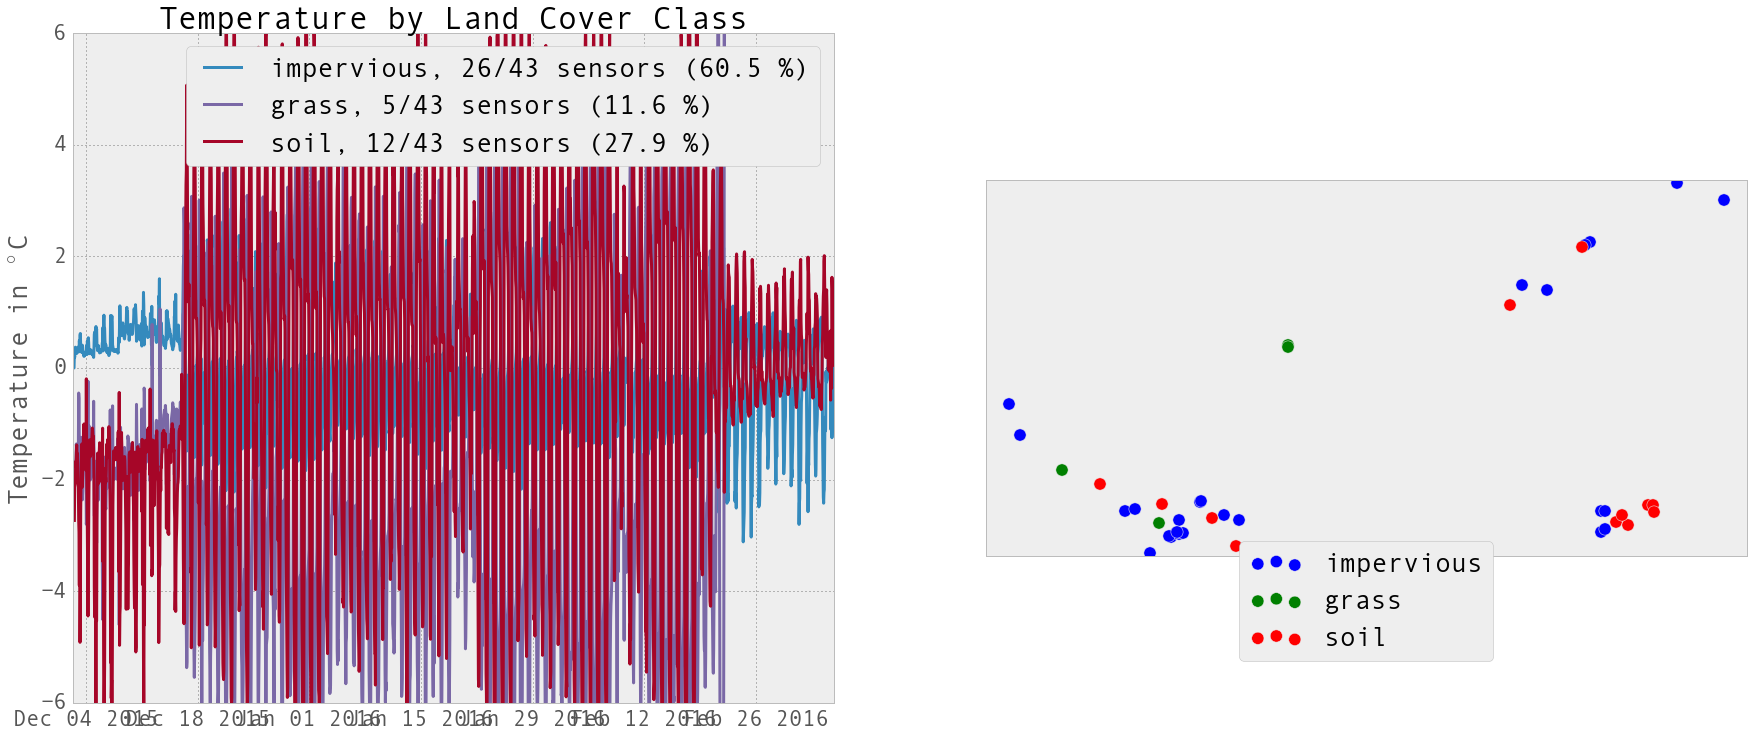

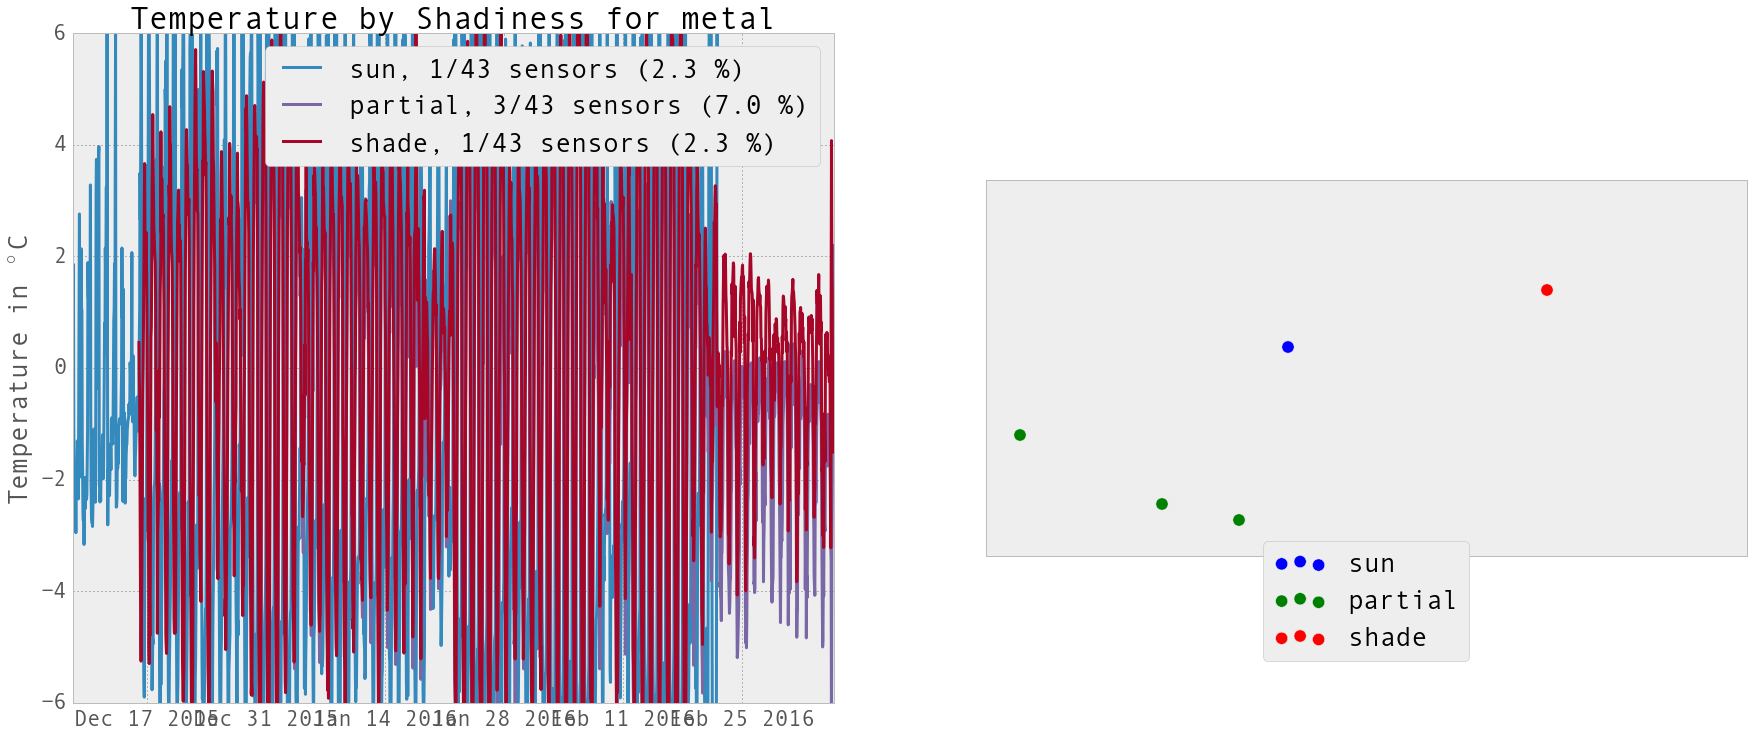

In [158]:
for option in {'landcoverclass', 'sunorshade', 'attachment'} : 
    ibuttonplots.timeseriesplots(anomalyDF,meta,option)
    #plt.savefig('diurnal%s.eps'%option, format = 'eps', dpi = 600)
ibuttonplots.timeseriesplots(anomalyDF, meta,'sunorshade', 'attachment', 'metal')

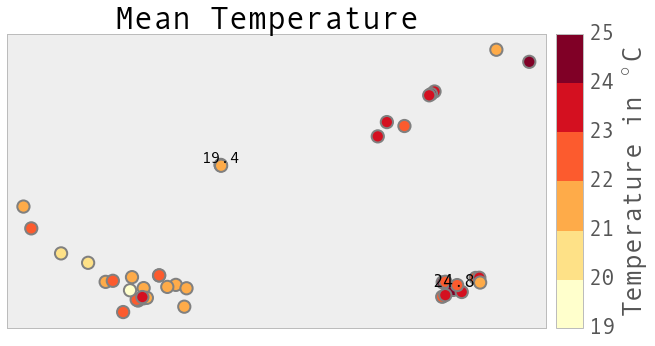

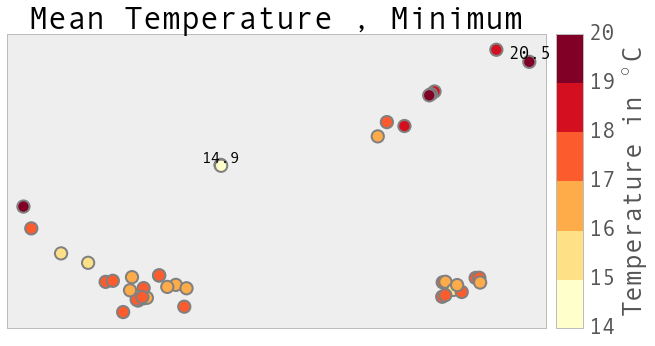

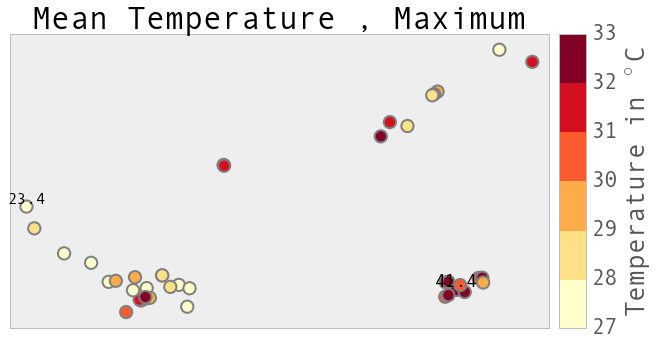

In [159]:
ibuttonplots.mapmean(tempDF, meta)
ibuttonplots.mapmean(tempDF.resample('D', how = 'min'), meta, ', Minimum')
ibuttonplots.mapmean(tempDF.resample('D', how = 'max'), meta, ', Maximum',)

In [57]:
reload(ibuttonplots)

<module 'ibuttonplots' from '../Bmore/ibuttonplots.py'>

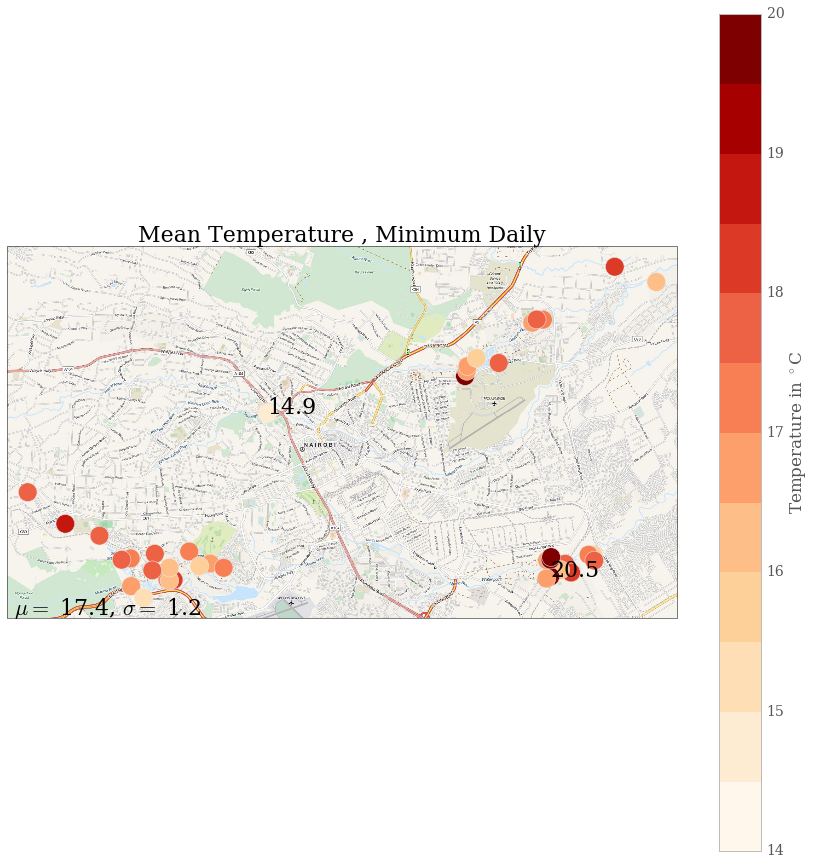

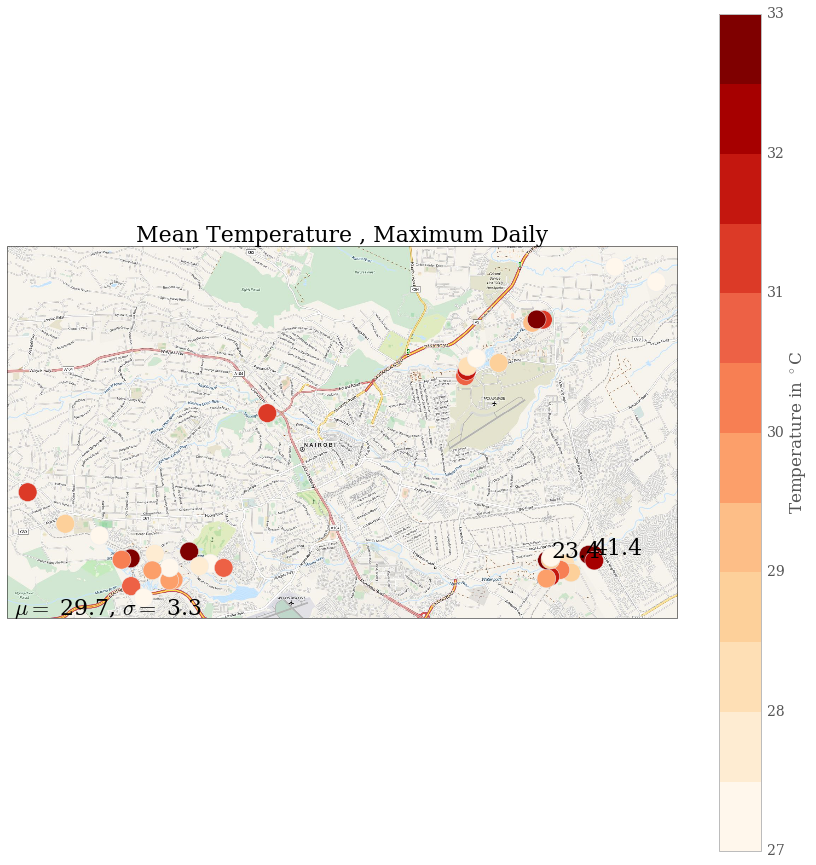

In [58]:
ibuttonplots.mapmean(tempDF.resample('D', how = 'min'), meta, ', Minimum Daily')
ibuttonplots.mapmean(tempDF.resample('D', how = 'max'), meta, ', Maximum Daily')

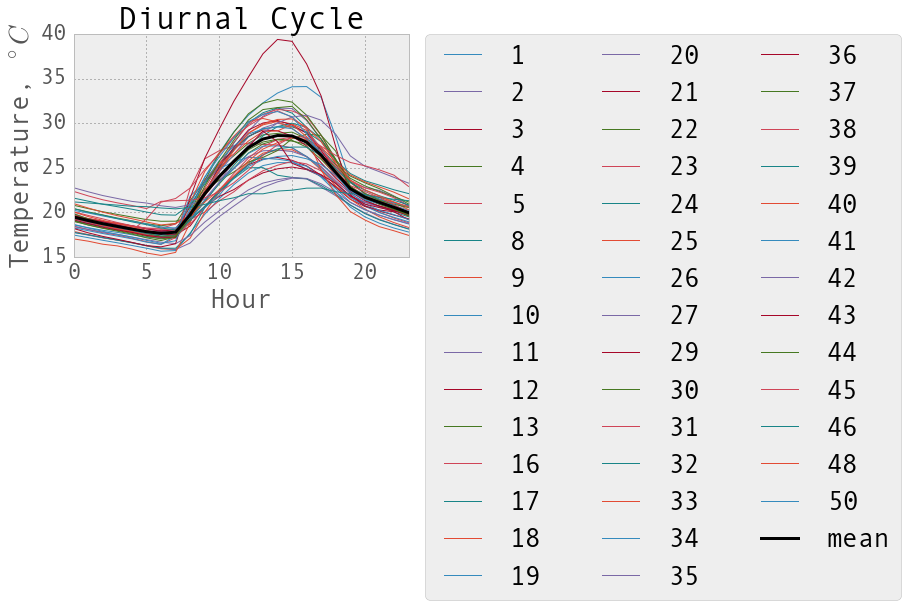

In [160]:
tempDF.groupby(tempDF.index.hour).mean().plot()
tempDF.groupby(tempDF.index.hour).mean().mean(axis=1).plot(color = 'black', linewidth = '3',label = 'mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Diurnal Cycle')

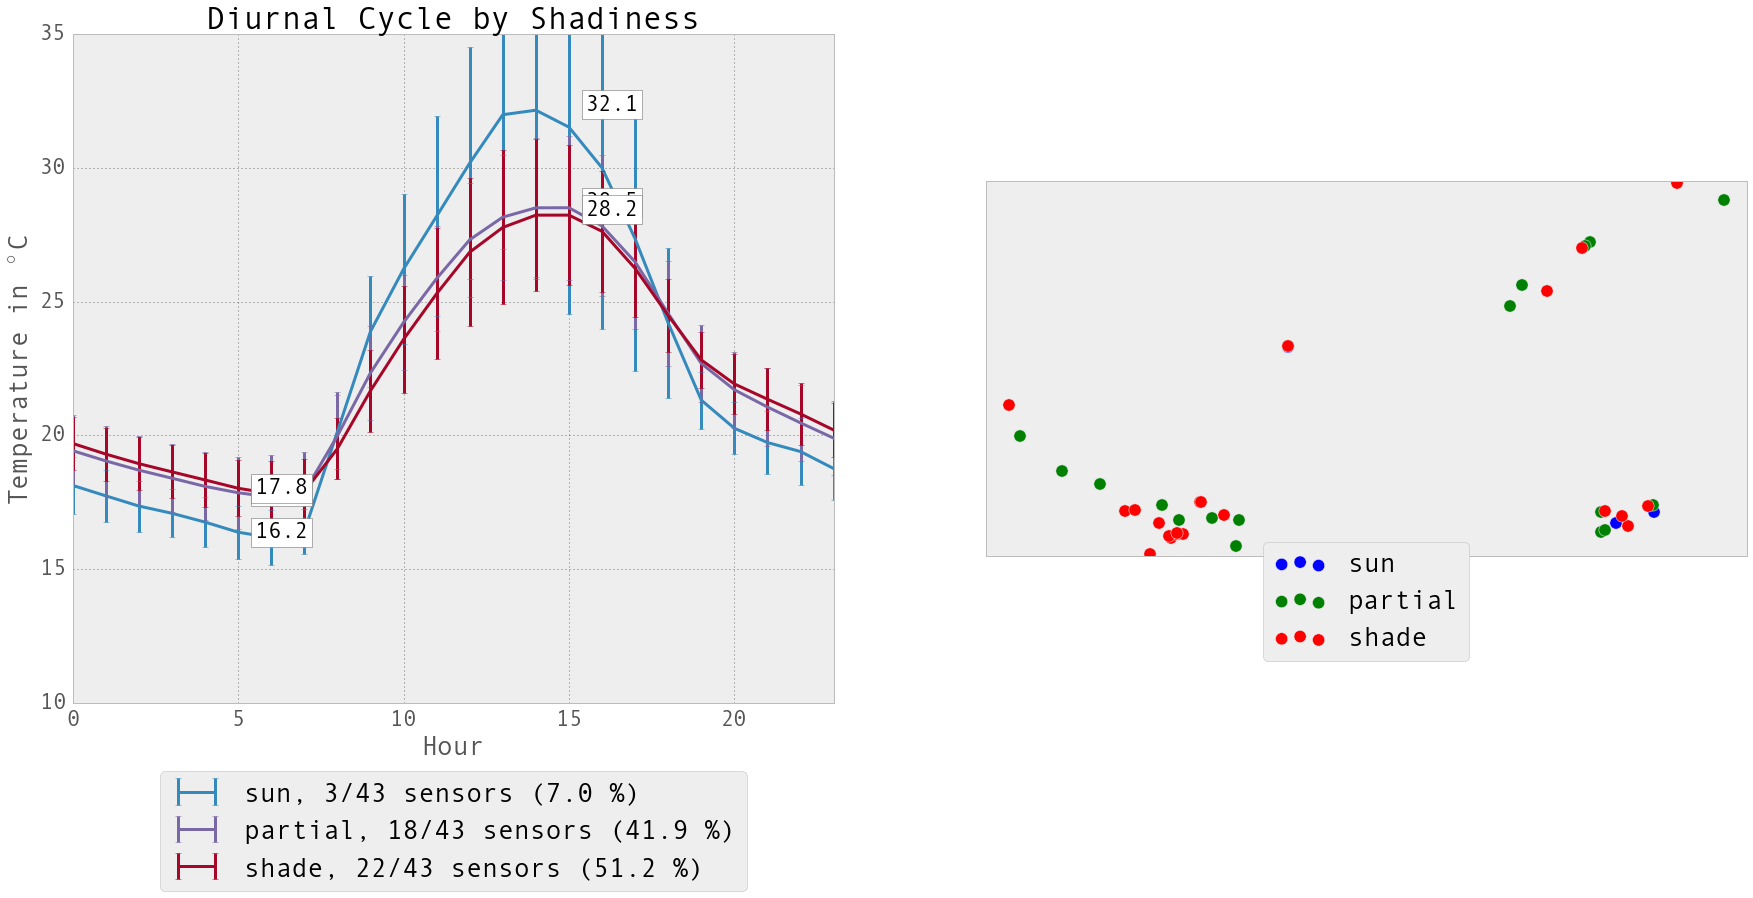

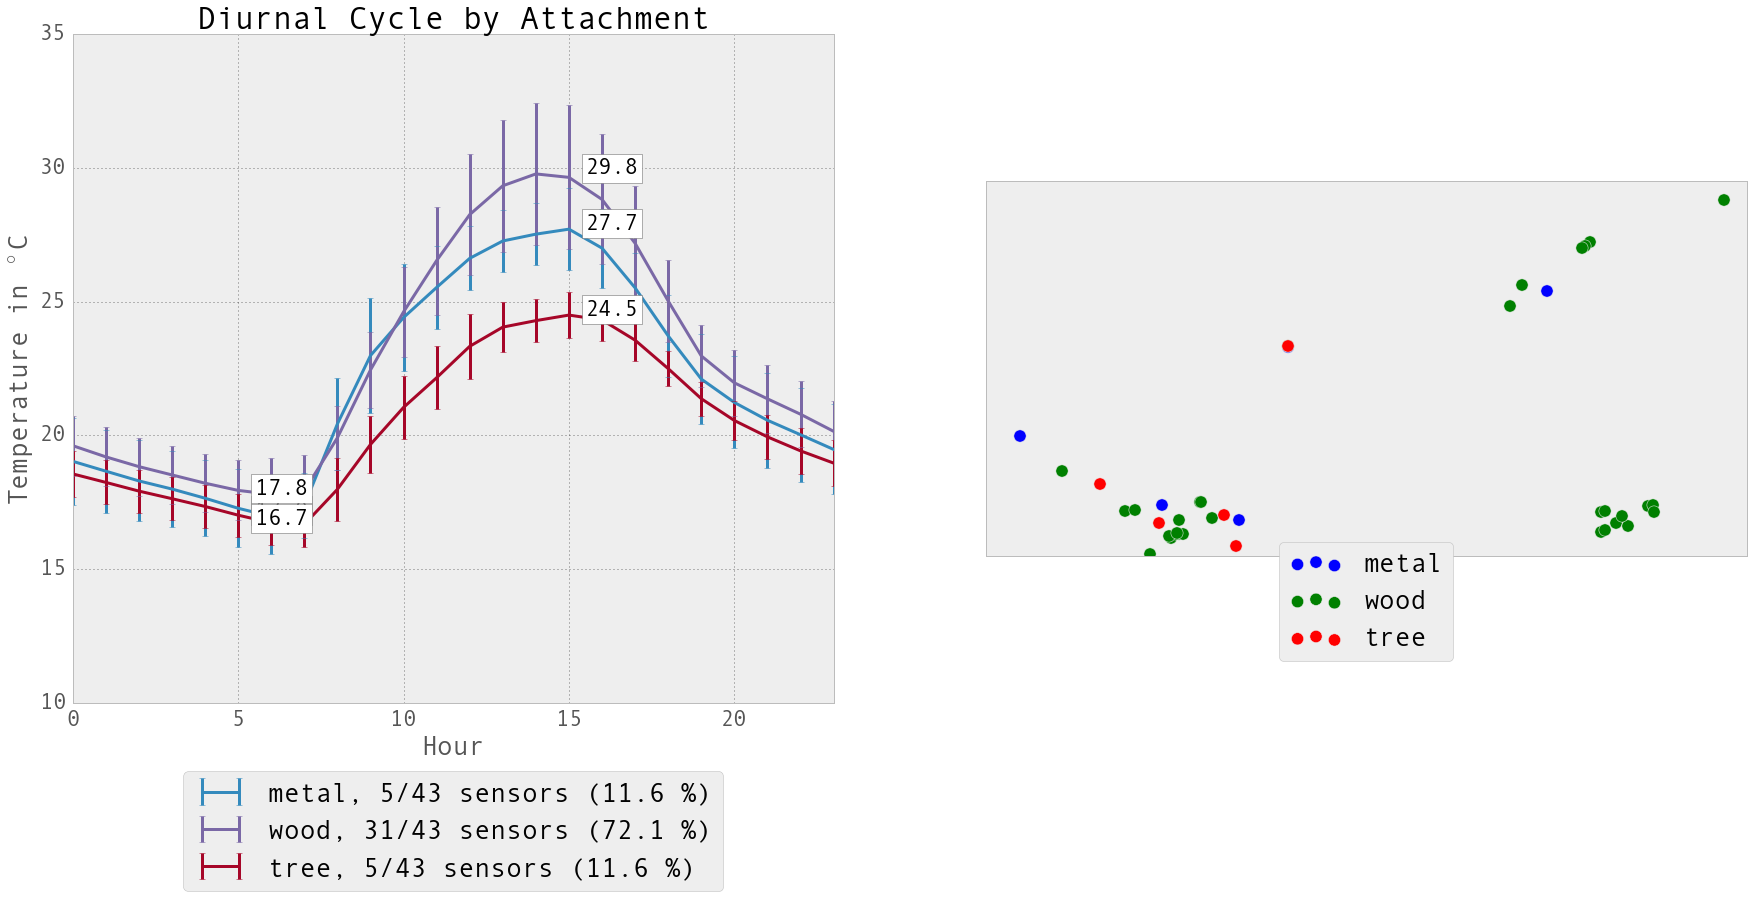

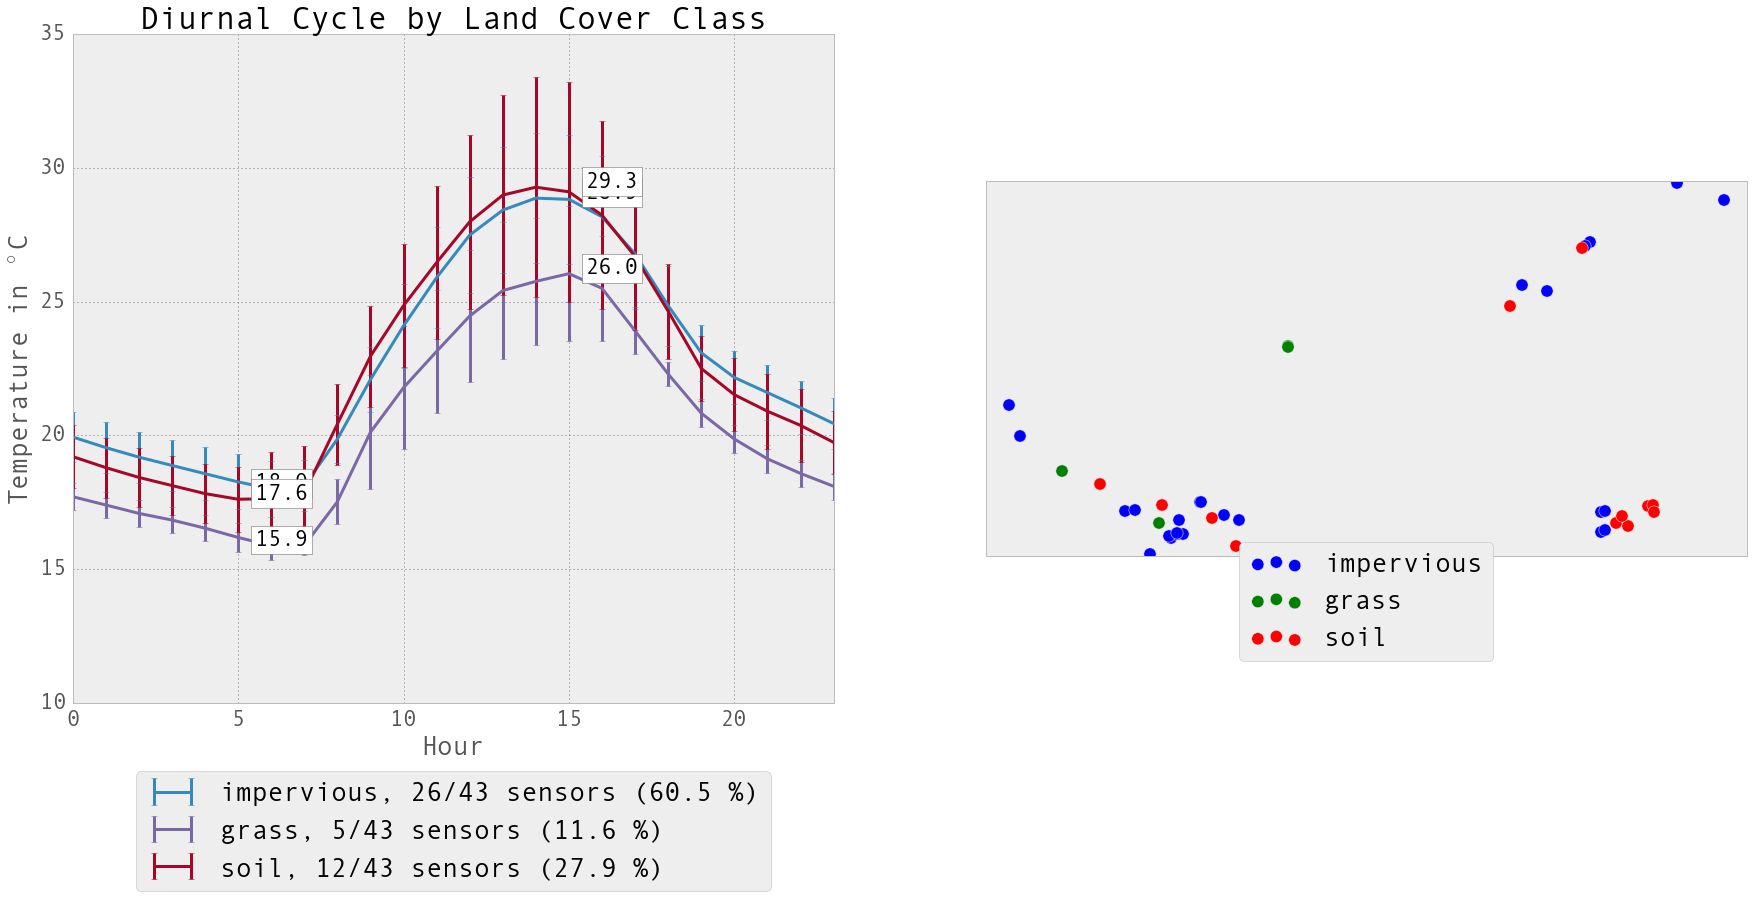

In [161]:
for option in {'landcoverclass', 'sunorshade', 'attachment'} : 
    ibuttonplots.diurnalplots(tempDF,meta, option)

skipping plot Diurnal Cycle by Land Cover Class for sun


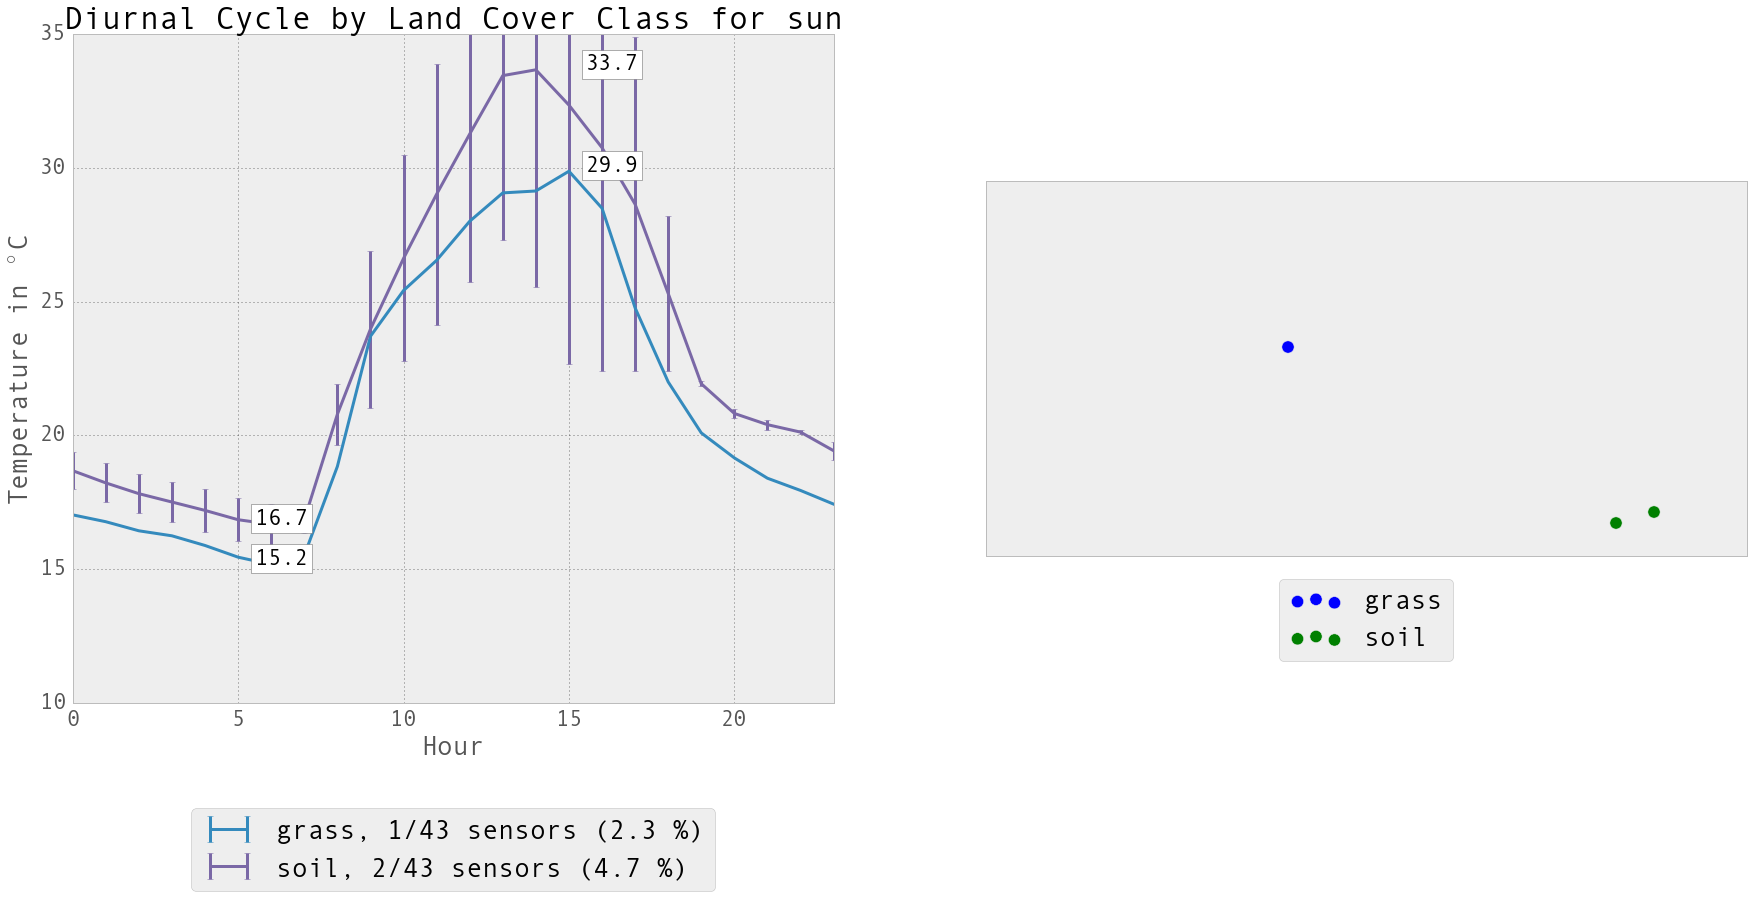

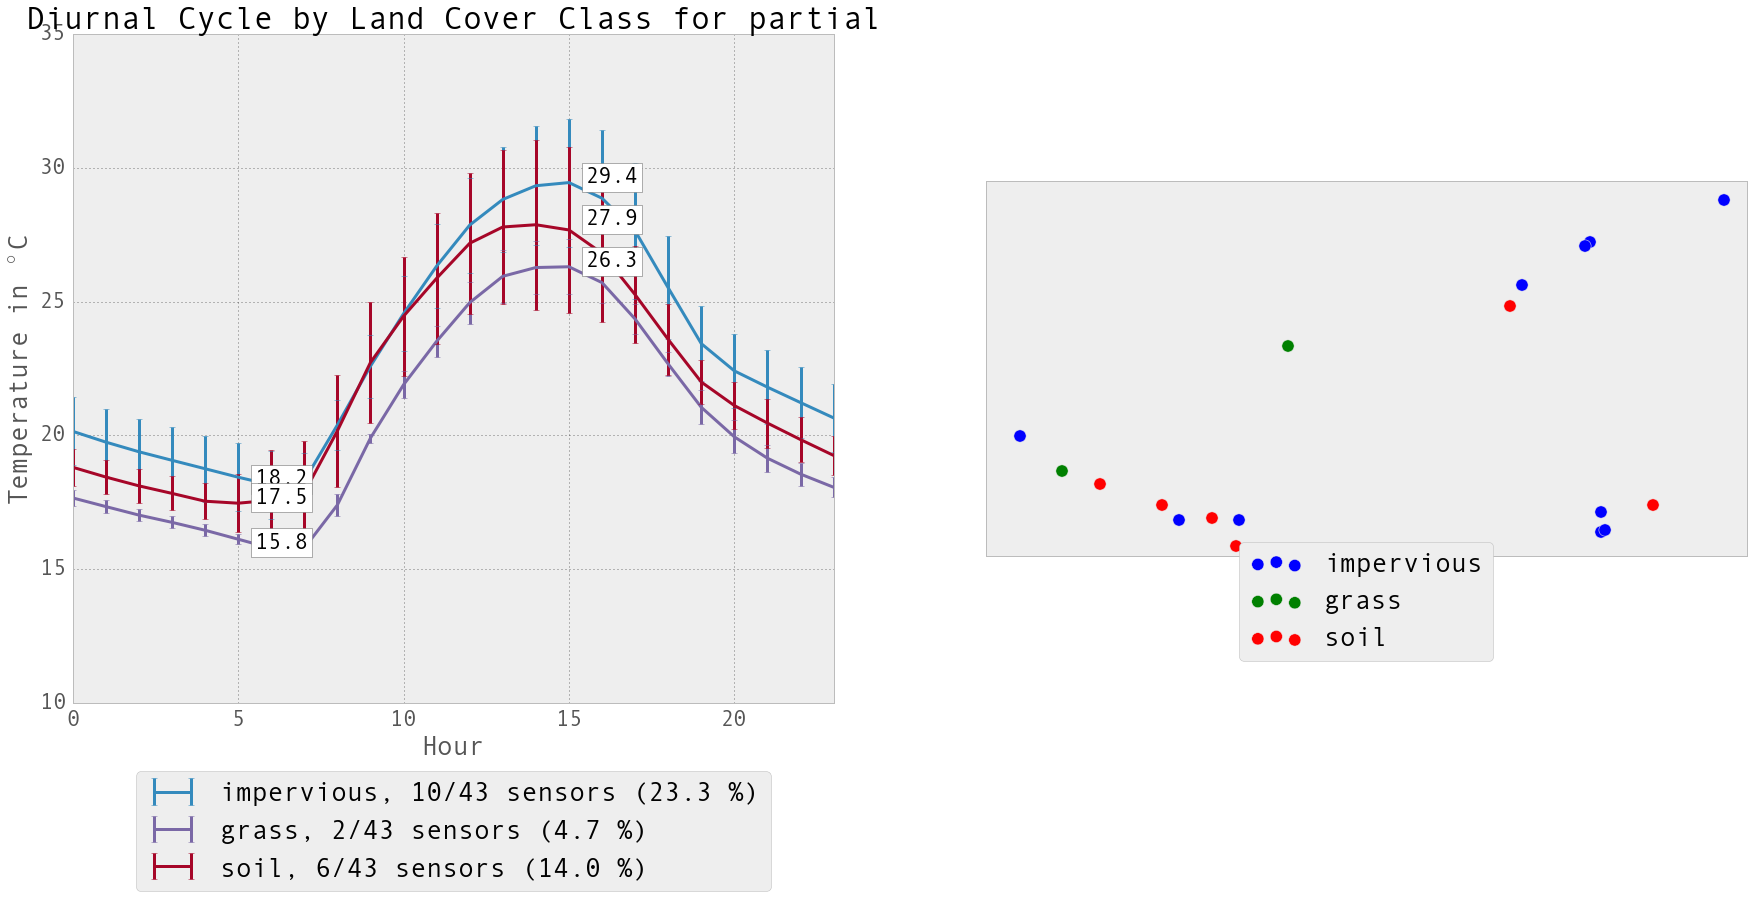

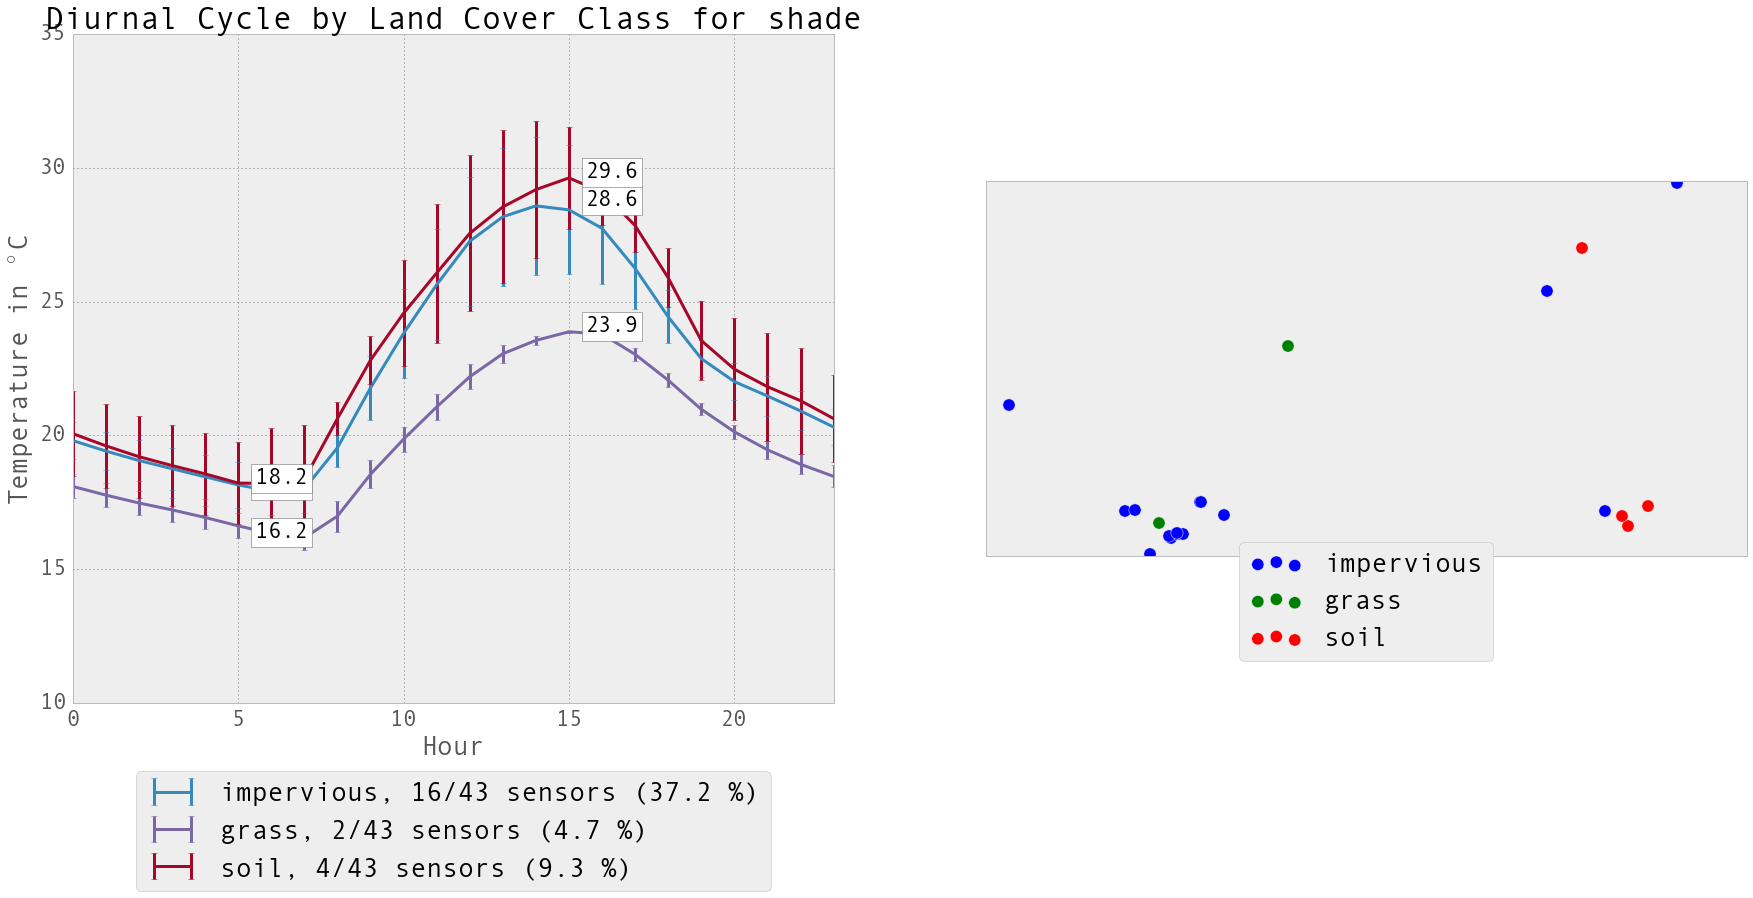

In [162]:
for option2 in {'shade', 'partial', 'sun'} : 
    ibuttonplots.diurnalplots(tempDF,meta, 'landcoverclass', 'sunorshade', option2)

/Users/ascott47/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


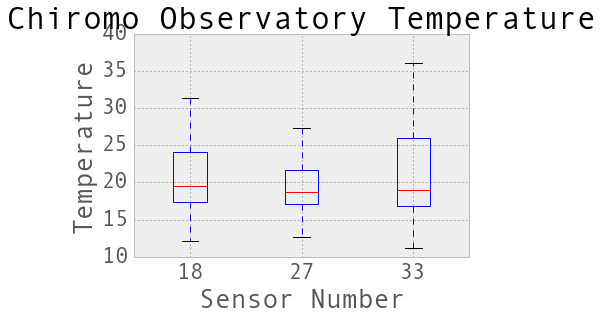

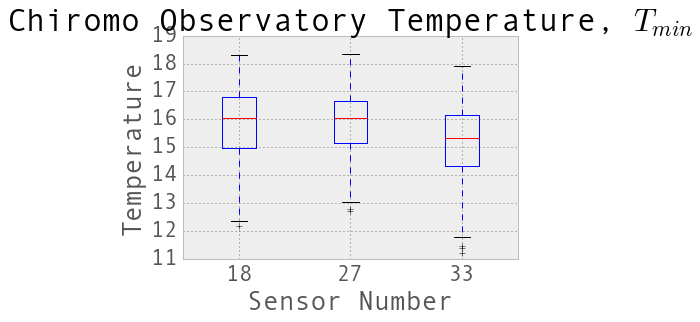

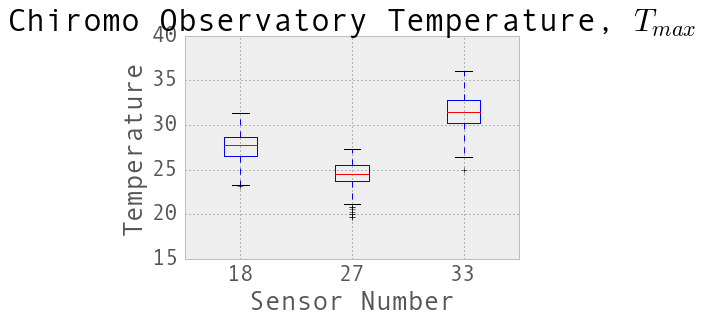

In [163]:
#compare similar iButtons
buttons = [18, 27,33]
handle = tempDF[buttons].boxplot()
plt.xlabel('Sensor Number')
plt.ylabel('Temperature')
plt.title('Chiromo Observatory Temperature')

plt.figure()
handle = tempDF[buttons].resample('D', how = 'min').boxplot()
plt.xlabel('Sensor Number')
plt.ylabel('Temperature')
plt.title('Chiromo Observatory Temperature, $T_{min}$')

plt.figure()
handle = tempDF[buttons].resample('D', how = 'max').boxplot()
plt.xlabel('Sensor Number')
plt.ylabel('Temperature')
plt.title('Chiromo Observatory Temperature, $T_{max}$')

In [13]:
meta.loc[36]

meta:instanceID               uuid:5181d736-ee51-4ba5-baec-561b64db3eed
sensornumber                                                         36
location:Latitude                                               -1.3125
location:Longitude                                              36.8803
location:Altitude                                                  1623
location:Accuracy                                                     5
direction                                                             0
sunorshade                                                          sun
attachment                                                         wood
landcoverclass                                                     soil
picture               https://bmorecoolodk.appspot.com/view/binaryDa...
time                                       Sun Dec 13 10:51:48 UTC 2015
notes                                              Kwa reuben mama vayo
Name: 36, dtype: object

(20, 46)

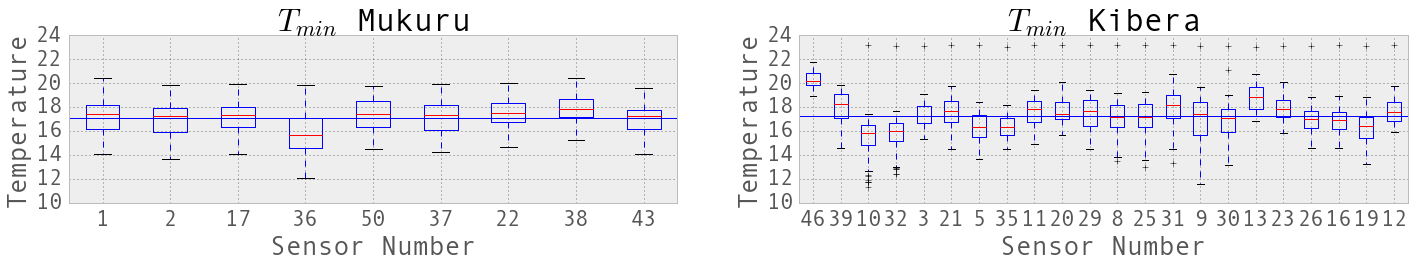

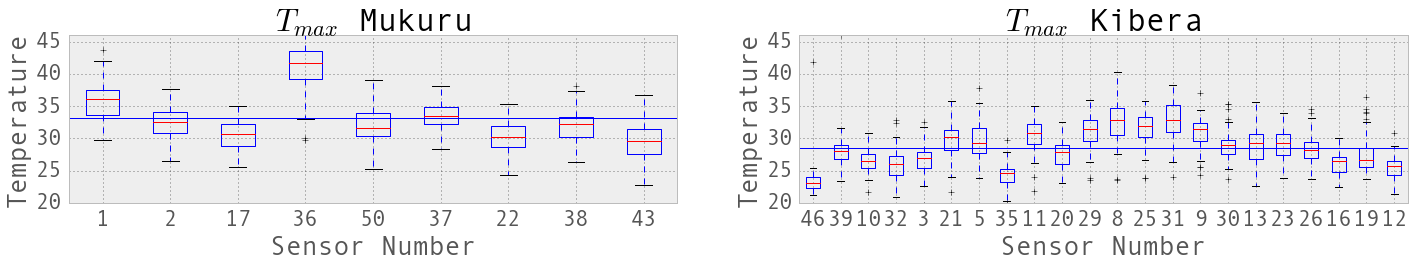

In [202]:
Mukuru =[1,2,17,36,50, 37, 22,38,43]
Kibera = [46,39,10,32,3,21,5,35,11,20,29,8,25,31,9,30,13,23,26,16,19,12]
#Mathare = [44,15, 28,40,48,45, 24,4,47]
fig = plt.figure(figsize=[24,3])
plt.subplot(1,2,1)
handle = tempDF[Mukuru].resample('D', how = 'min').boxplot()
plt.axhline(tempDF[Mukuru].resample('D', how = 'min').mean().mean())
plt.title('$T_{min}$ Mukuru')
plt.xlabel('Sensor Number')
plt.ylabel('Temperature')
plt.ylim([10,24])

plt.subplot(1,2,2)
handle = tempDF[Kibera].resample('D', how = 'min').boxplot()
plt.axhline(tempDF[Kibera].resample('D', how = 'min').mean().mean())
plt.title('$T_{min}$ Kibera')
plt.xlabel('Sensor Number')
plt.ylabel('Temperature')
plt.ylim([10,24])

fig = plt.figure(figsize=[24,3])
plt.subplot(1,2,1)
handle = tempDF[Mukuru].resample('D', how = 'max').boxplot()
plt.axhline(tempDF[Mukuru].resample('D', how = 'max').mean().mean())
plt.title('$T_{max}$ Mukuru')
plt.xlabel('Sensor Number')
plt.ylabel('Temperature')
plt.ylim([20,46])

plt.subplot(1,2,2)
handle = tempDF[Kibera].resample('D', how = 'max').boxplot()
plt.axhline(tempDF[Kibera].resample('D', how = 'max').mean().mean())
plt.title('$T_{max}$ Kibera')
plt.xlabel('Sensor Number')
plt.ylabel('Temperature')
plt.ylim([20,46])

# sensors with large diurnal range, T_(min) below average, T_(max) above average
# Mukuru: 36 
# Kibera: 46, 

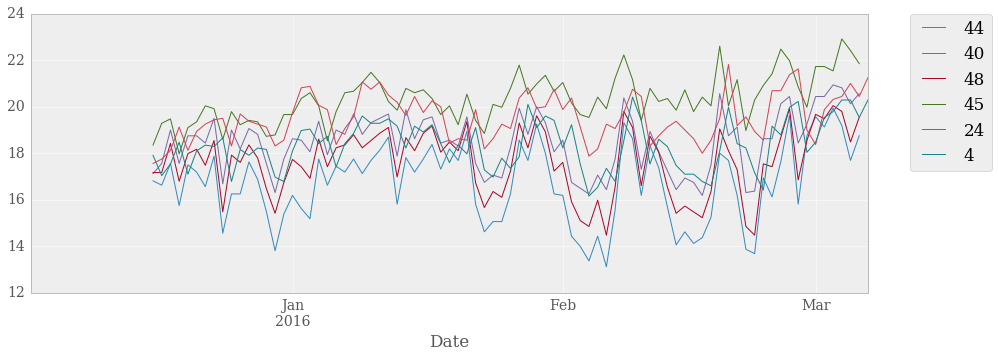

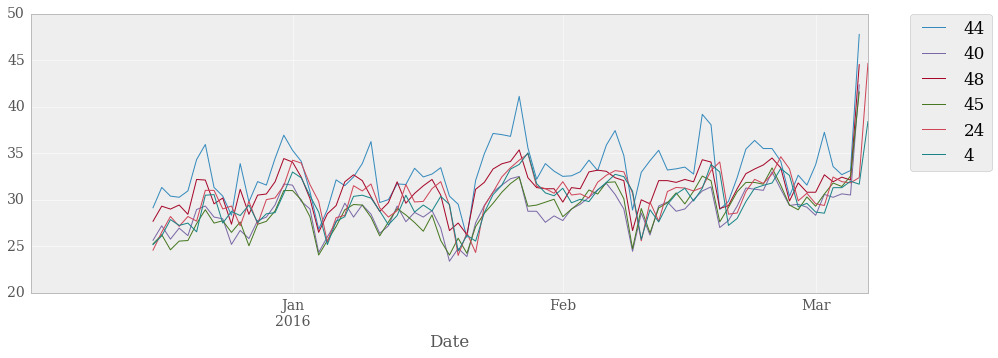

In [8]:
# Mathare
tempDF[Mathare].resample('D').min().plot(figsize=[15,5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Mathare')

tempDF[Mathare].resample('D').max().plot(figsize=[15,5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)

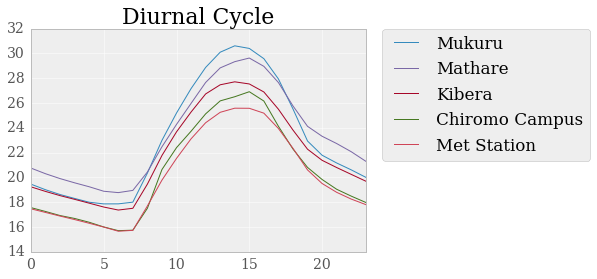

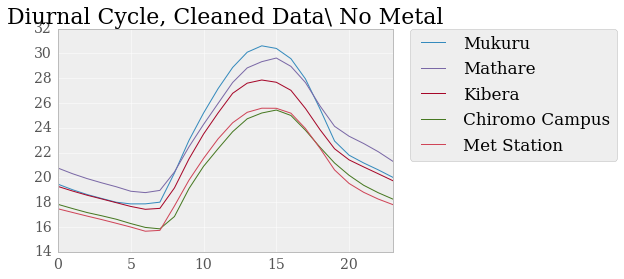

In [16]:
Mukuru =[1,2,17,50, 37, 22,38,43] # throw out 36 since it's too high, 
Kibera = [39,10,32,3,21,5,35,11,20,29,8,25,31,9,13,23,26,16,19,12] # sensor 30 inside a house, 46 also inside
chiromo = [18, 27,33]
Mathare = [44,40,48,45, 24,4]# 15, 28, 47 not there

tempDF[Mukuru].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF[Mathare].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF[Kibera].groupby(tempDF.index.hour).mean().mean(axis=1).plot()

tempDF[chiromo].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF[10].groupby(tempDF.index.hour).mean().plot()
#tempDF[30].groupby(tempDF.index.hour).mean().plot()

plt.legend(['Mukuru', 'Mathare', 'Kibera', 
            'Chiromo Campus', 'Met Station',],# 'Indoors Kibera'],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Diurnal Cycle')

plt.figure()
metal = meta[meta['attachment']=='metal'].index
cleanedDF = tempDF.drop(metal, axis=1)
MukuruCleaned =[1,2,17,50, 37, 22,38,43] # throw out 36 since it's too high, 
KiberaCleaned = [10,32,3,21,35,11,20,29,8,25,31,9,13,23,26,16,12] # sensor 30 inside a house, 46 also inside
chiromoCleaned = [18, 27]
Mathare = [44,40,48,45, 24,4]# 15, 28, 47 not there

tempDF.drop(metal, axis=1)[MukuruCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF[Mathare].groupby(tempDF.index.hour).mean().mean(axis=1).plot()

tempDF.drop(metal, axis=1)[KiberaCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF.drop(metal, axis=1)[chiromoCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF[10].groupby(tempDF.index.hour).mean().plot()

plt.legend(['Mukuru', 'Mathare', 'Kibera', 'Chiromo Campus', 'Met Station'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Diurnal Cycle, Cleaned Data (No Metal)')

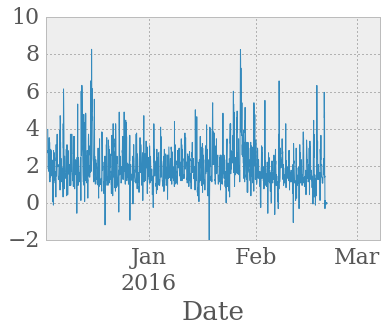

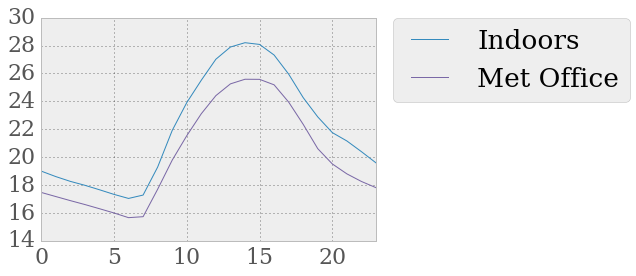

In [411]:
(tempDF[30] - tempDF[10]).plot()

tempDF[[30,10]].groupby(tempDF.index.hour).mean().plot()
plt.legend(['Indoors','Met Office'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)

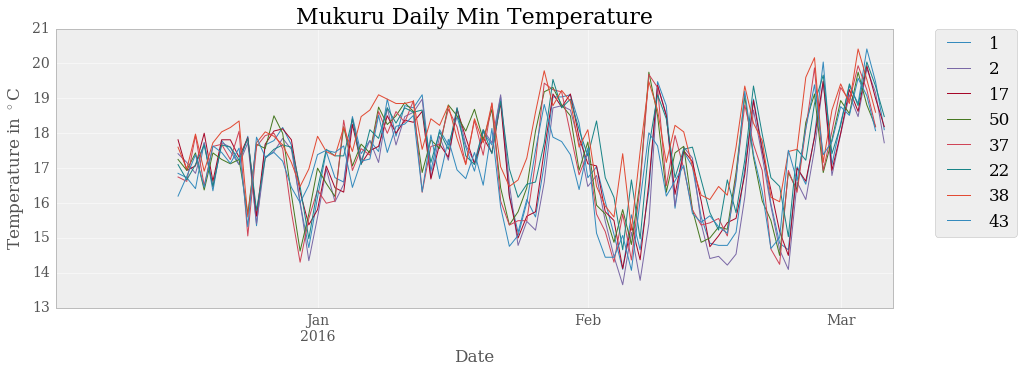

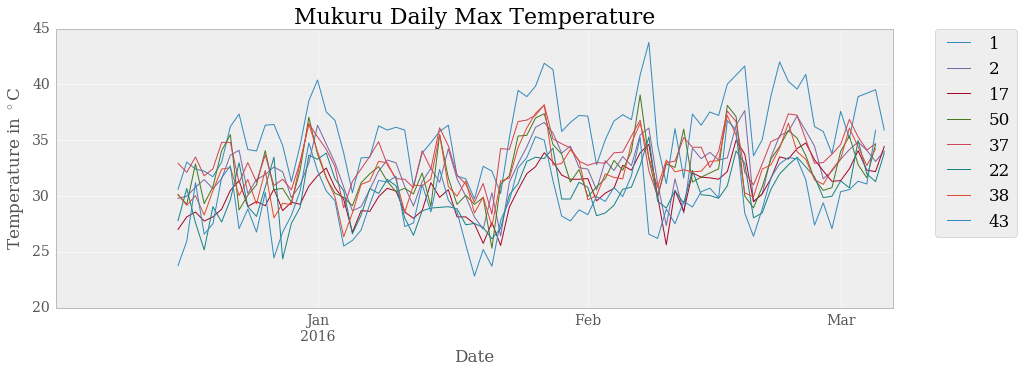

In [10]:
tempDF[Mukuru].resample('D').min().plot(figsize=[15,5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Mukuru Daily Min Temperature')
plt.ylabel('Temperature in $^\circ $C')

tempDF[Mukuru].resample('D').max().plot(figsize=[15,5])
#tempDF.resample('D', how= 'max').mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Mukuru Daily Max Temperature')
plt.ylabel('Temperature in $^\circ $C')

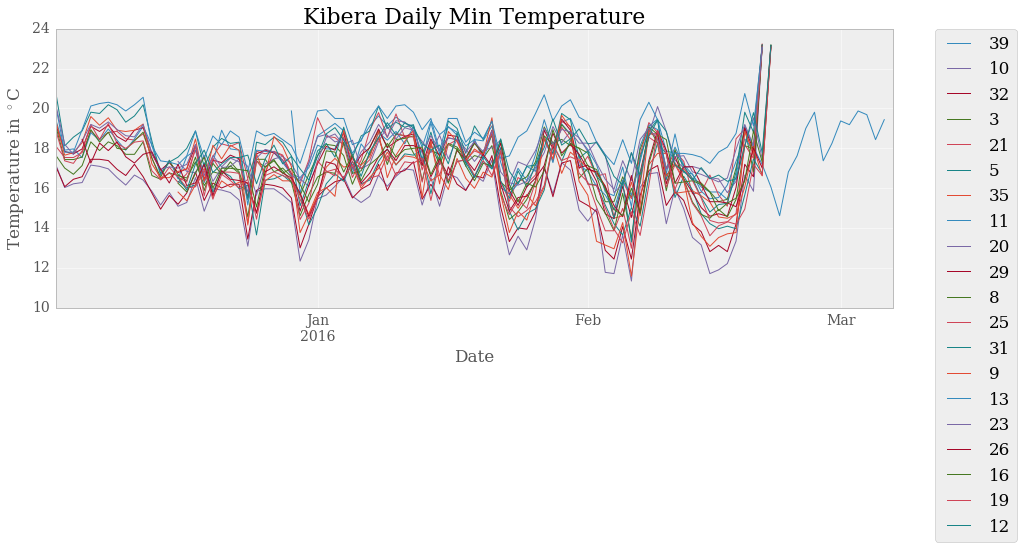

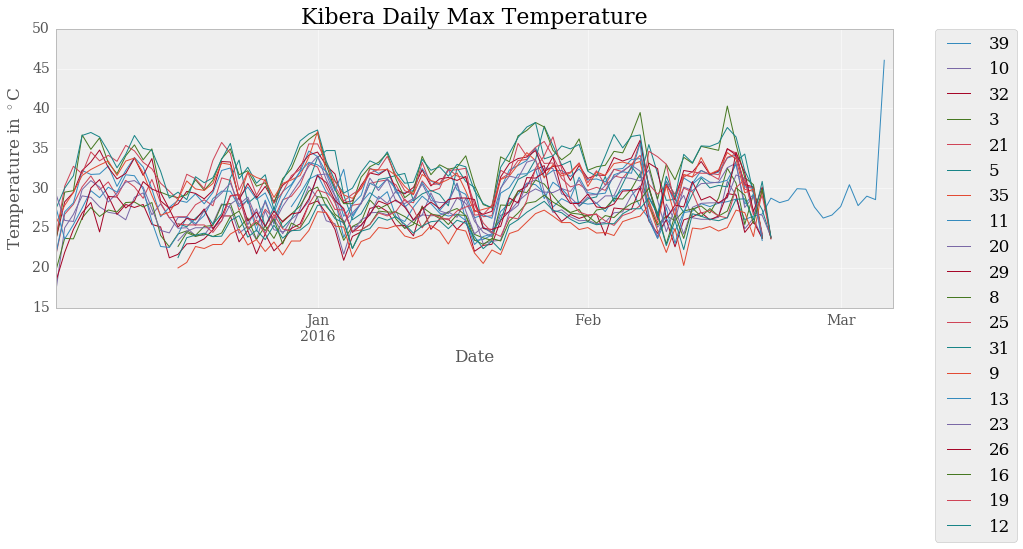

In [9]:
tempDF[Kibera].resample('D').min().plot(figsize=[15,5])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Kibera Daily Min Temperature')
plt.ylabel('Temperature in $^\circ $C')

tempDF[Kibera].resample('D').max().plot(figsize=[15,5])
#tempDF.resample('D', how= 'max').mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Kibera Daily Max Temperature')
plt.ylabel('Temperature in $^\circ $C')

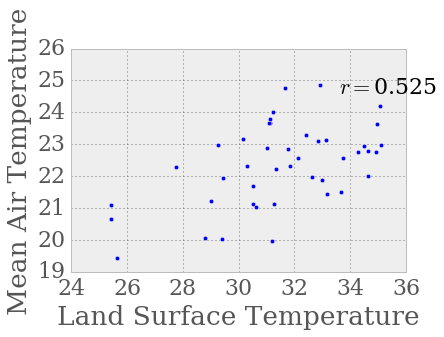

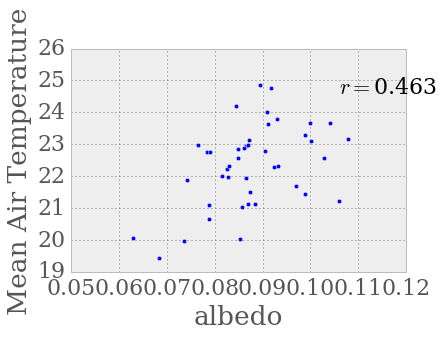

In [419]:
import spatialfunctions
lon = meta['location:Longitude']
lat = meta['location:Latitude']
rasterfile = '../satellite/data/Nairobi/L8OLI_TIRS/LC81680612015005LGN00/LC81680612015005LGN00_B10.TIF'
band10 = spatialfunctions.extract_raster_values(lon,lat, rasterfile)
LST = spatialfunctions.band10_toLST(band10)

path = '../satellite/data/Nairobi/L8OLI_TIRS/LC81680612015005LGN00/'
B = np.zeros((5,lon.shape[0]))
for i in (1,2,3,4,5): 
    file = path+ 'LC81680612015005LGN00_B'+'%s'%i +'.TIF'
    DN = spatialfunctions.extract_raster_values(lon,lat,file)
    # convert from digital number to toa reflectance  using : rho*\lambda = REFLECTANCE_MULT_BAND_x*DN +REFLECTANCE_ADD_BAND_x
    reflectance_mult_band = 2.000e-5
    reflectance_add_band  = -0.100000
    B[i-1, :] = reflectance_mult_band*DN+reflectance_add_band

alb = spatialfunctions.albedo(B[0,:], B[1,:], B[2,:], B[3,:], B[4,:], )
alb[alb>1] = 'NaN'
alb[alb<0] = 'NaN'

airtemp = tempDF.resample('D').mean().mean()
plt.scatter(LST, airtemp)
r = np.corrcoef(LST, airtemp)[0,1]
plt.xlabel('Land Surface Temperature')
plt.ylabel('Mean Air Temperature')
plt.annotate('$r=$%.3f'%r,xy=(.8, .8), xycoords ='axes fraction')

plt.figure()
plt.scatter(alb, airtemp)
r = np.corrcoef(alb, airtemp)[0,1]
plt.xlabel('albedo')
plt.ylabel('Mean Air Temperature')
plt.annotate('$r=$%.3f'%r,xy=(.8, .8), xycoords ='axes fraction')

In [56]:
radiation = pd.read_csv('./data/RADIATION DATA.csv', sep=",", infer_datetime_format =True, date_parser=0)
radiation['Date'] = pd.to_datetime(radiation['Date'])
radiation = radiation.set_index('Date') #

dictionary = {'December': '2015-12',
 'february': '2016-02',
 'january': '2016-01',
 'march': '2016-03'}
obs = pd.read_csv('./data/nariboikmstemperature.csv', sep = ",") #parse_dates={'datetime':[0,1]},
obs = obs.set_index(pd.to_datetime(['%s-%s'% (dictionary[x], y) for (x, y) in zip(obs['MONTH'].values, obs['DATE'].values)]))

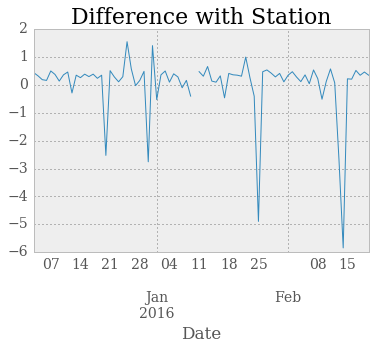

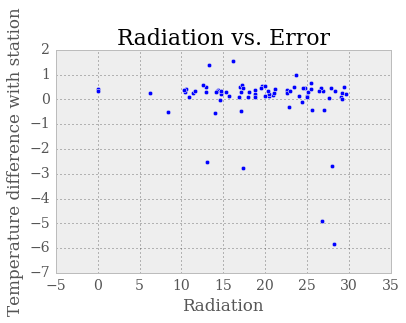

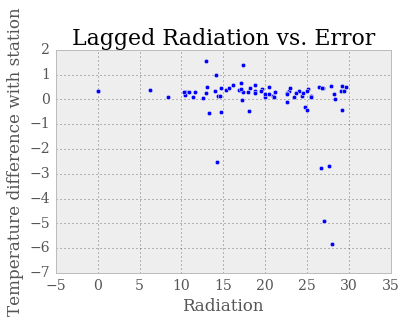

In [159]:
#plot temperature difference at station and see if it varies according to temperature
# only for sensor 10 
startdate = '2015-12-03'
enddate = '2016-02-20'
diff = tempDF[10][startdate:enddate].resample('D').min().subtract(obs[startdate:enddate].TMIN)

diff.plot()
plt.title('Difference with Station')

plt.figure()
plt.scatter(radiation[startdate:enddate], diff)
plt.xlabel('Radiation')
plt.ylabel('Temperature difference with station')
plt.title('Radiation vs. Error')

plt.figure()
plt.scatter(radiation[startdate:enddate][:-1], diff[1:])
plt.xlabel('Radiation')
plt.ylabel('Temperature difference with station')
plt.title('Lagged Radiation vs. Error')

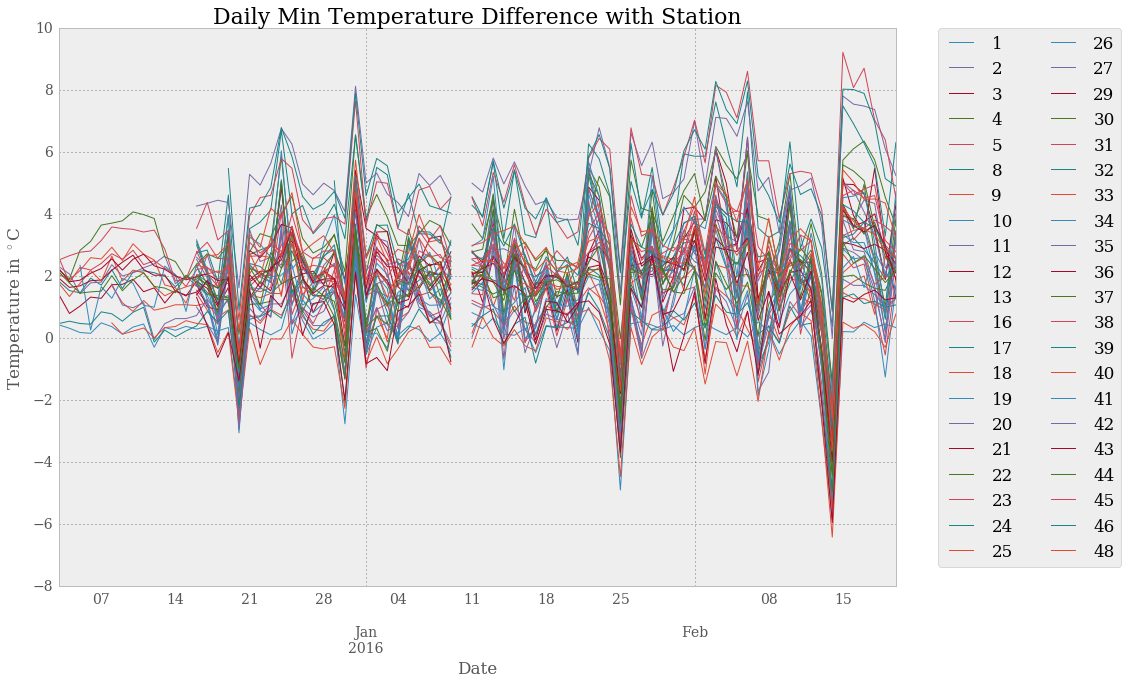

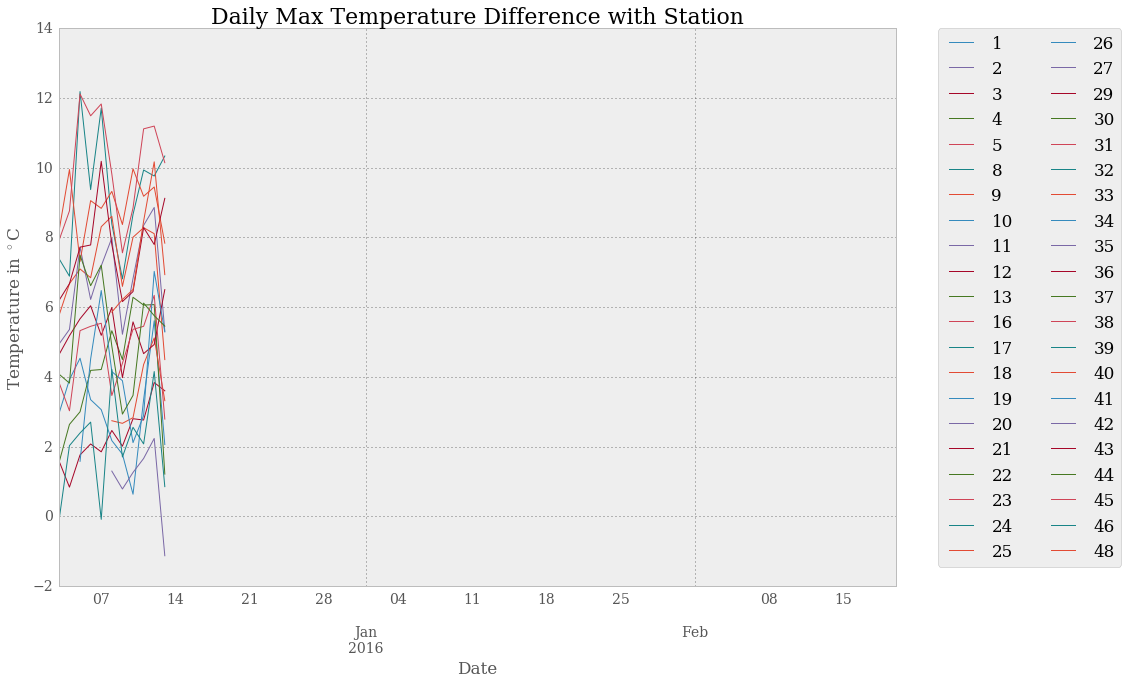

In [171]:
tempDF[startdate:enddate].resample('D').min().subtract(obs[startdate:enddate].TMIN,axis =0).plot(figsize=[15,10])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Min Temperature Difference with Station')
plt.ylabel('Temperature in $^\circ $C')



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Max Temperature Difference with Station')
plt.ylabel('Temperature in $^\circ $C')

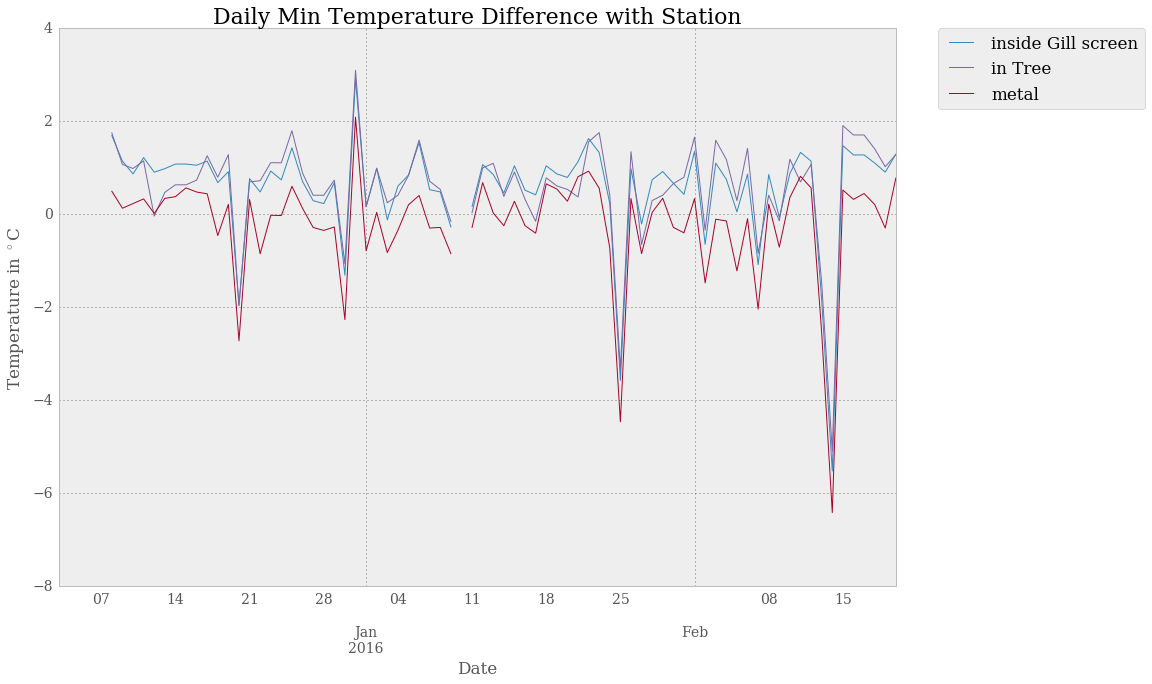

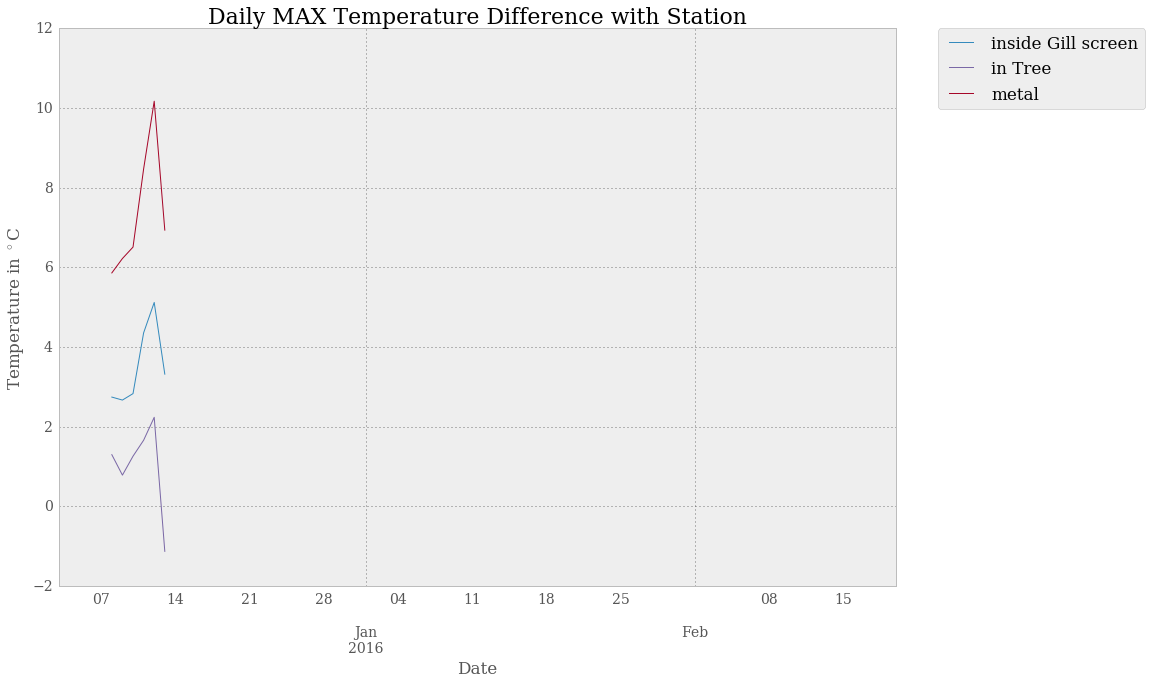

In [182]:
buttons = [18, 27,33] #chiromo observatory buttons

tempDF[startdate:enddate][buttons].resample('D').min().subtract(obs[startdate:enddate].TMIN,axis =0).plot(figsize=[15,10])

plt.legend(['inside Gill screen', 'in Tree', 'metal'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Daily Min Temperature Difference with Station')
plt.ylabel('Temperature in $^\circ $C')

tempDF[startdate:enddate][buttons].resample('D').max().subtract(obs[startdate:enddate].TMAX,axis =0).plot(figsize=[15,10])

plt.legend(['inside Gill screen', 'in Tree', 'metal'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Daily MAX Temperature Difference with Station')
plt.ylabel('Temperature in $^\circ $C')

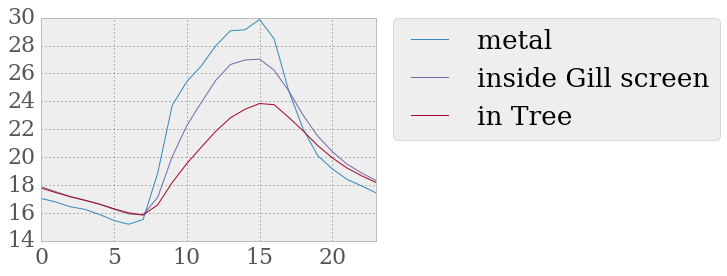

In [325]:
tempDF[[ 33, 18, 27,]].groupby(tempDF.index.hour).mean().plot()
plt.legend(['metal','inside Gill screen',  'in Tree',], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)


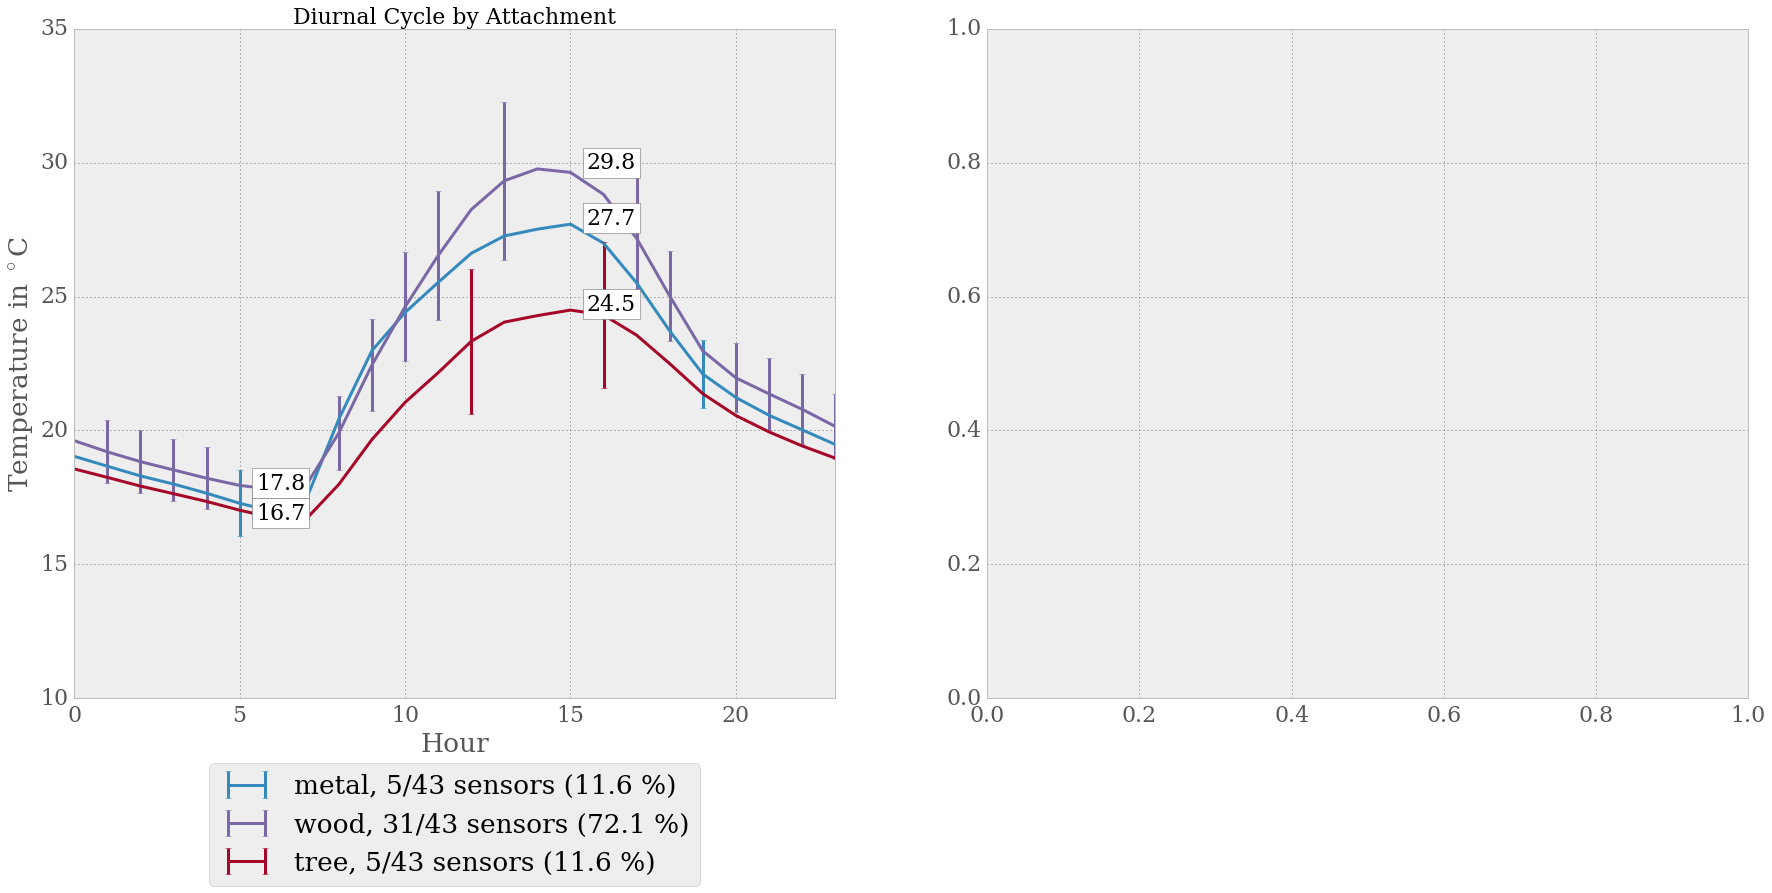

In [340]:
ibuttonplots.diurnalplots(tempDF,meta, 'attachment')

In [3]:
pd.__version__

u'0.18.1'

In [6]:
metal

Int64Index([5, 19, 33, 39, 40], dtype='int64', name=u'sensornumber')

In [2]:
metal = meta[meta['attachment']=='metal'].index
cleanedDF = tempDF.drop(metal, axis=1)

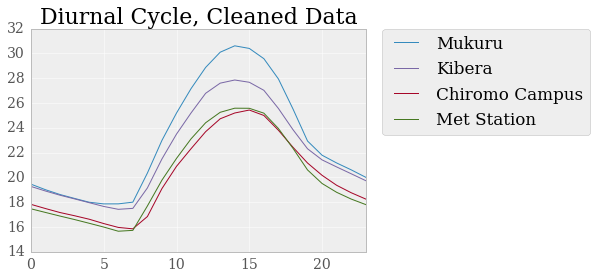

In [7]:
metal = meta[meta['attachment']=='metal'].index
cleanedDF = tempDF.drop(metal, axis=1)

MukuruCleaned =[1,2,17,50, 37, 22,38,43] # throw out 36 since it's too high, 
KiberaCleaned = [10,32,3,21,35,11,20,29,8,25,31,9,13,23,26,16,12] # sensor 30 inside a house, 46 also inside
chiromoCleaned = [18, 27]
tempDF.drop(metal, axis=1)[MukuruCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF.drop(metal, axis=1)[KiberaCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF.drop(metal, axis=1)[chiromoCleaned].groupby(tempDF.index.hour).mean().mean(axis=1).plot()
tempDF[10].groupby(tempDF.index.hour).mean().plot()

plt.legend(['Mukuru', 'Kibera', 'Chiromo Campus', 'Met Station'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)
plt.title('Diurnal Cycle, Cleaned Data')

In [345]:
# can errors in attachment cause errors in daily temperature? 

metal = meta[meta['attachment']=='metal'].index
wood = meta[meta['attachment']=='wood'].index
tree = meta[meta['attachment']=='tree'].index

metaldiff = tempDF[startdate:enddate][metal].subtract(tempDF[startdate:enddate][33],axis=0)
wooddiff = tempDF[startdate:enddate][wood].subtract(tempDF[startdate:enddate][18],axis=0)
treediff = tempDF[startdate:enddate][tree].subtract(tempDF[startdate:enddate][27],axis=0)

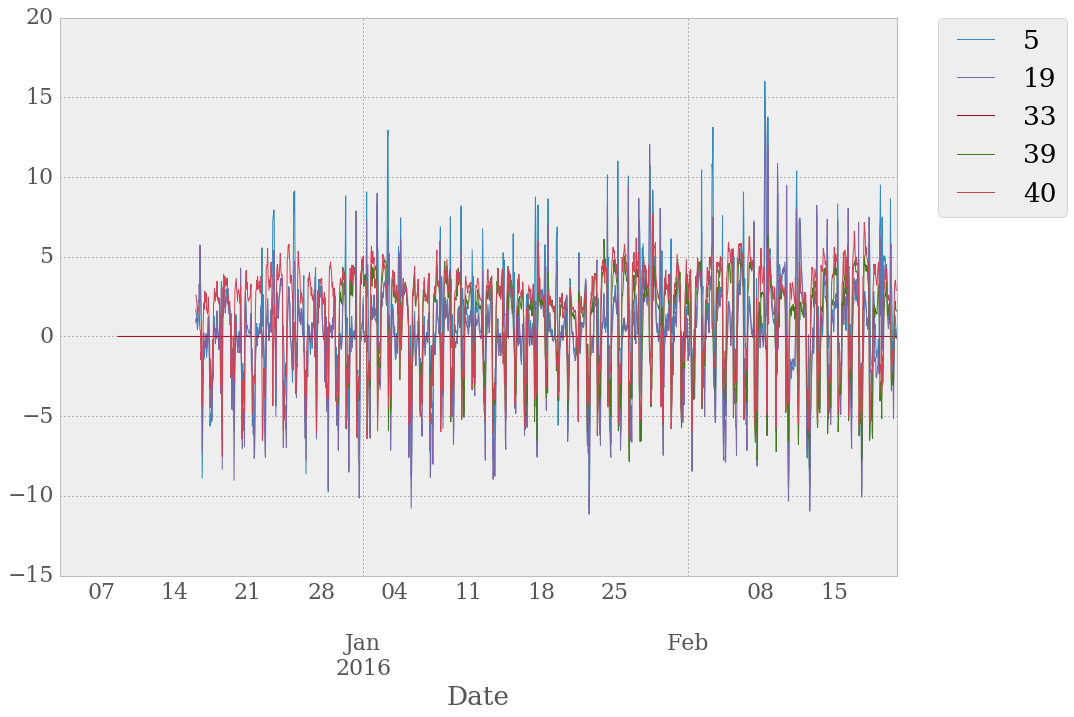

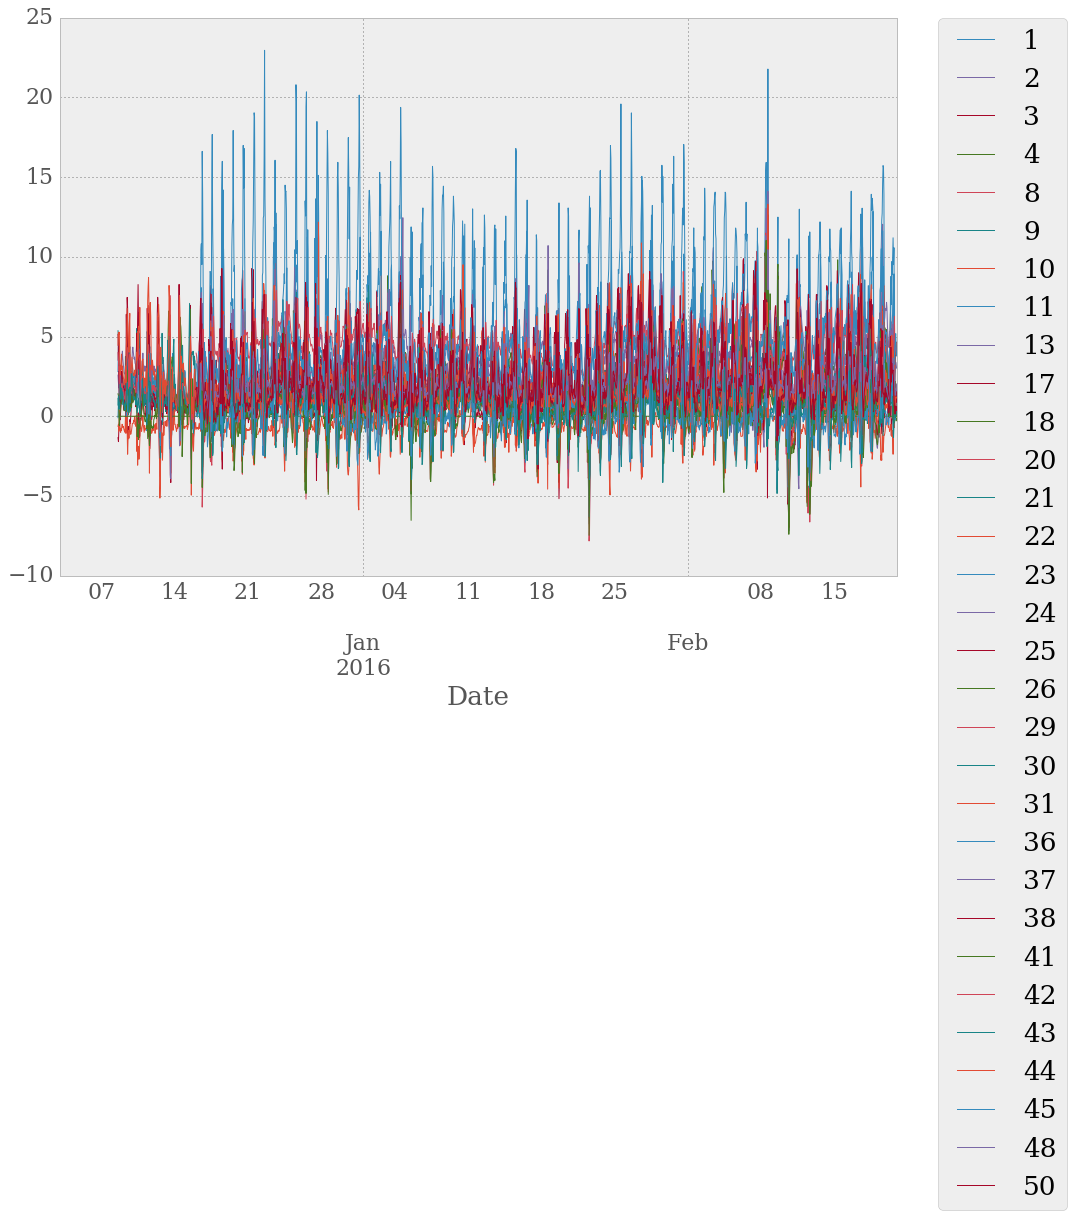

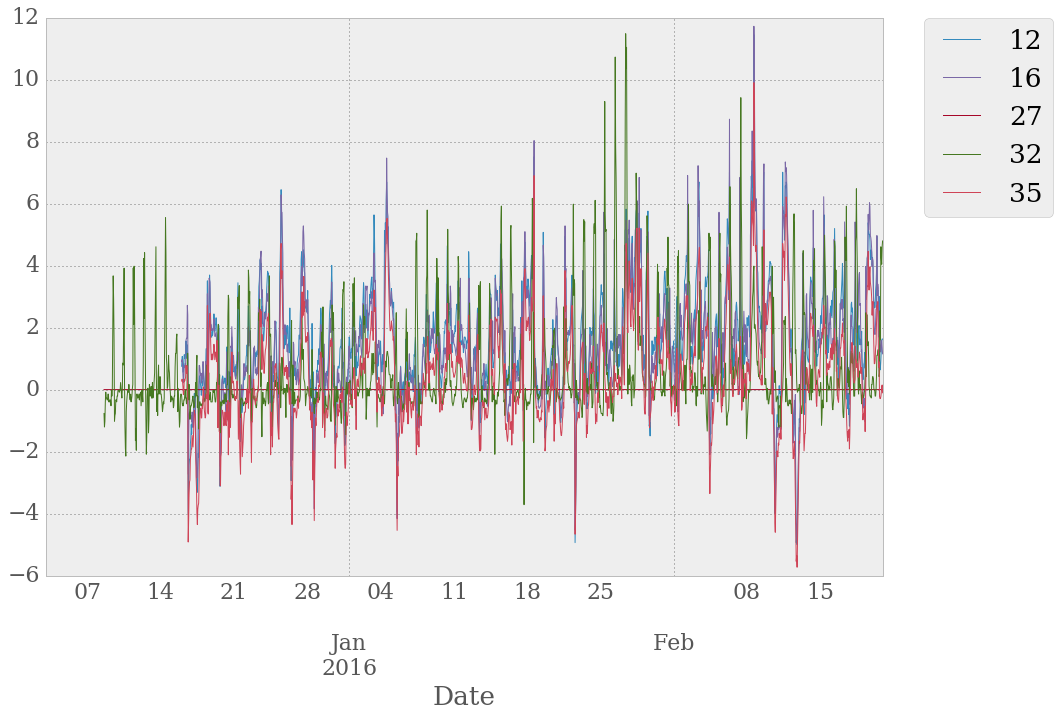

In [351]:
metaldiff.plot(figsize=[15,10])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)

wooddiff.plot(figsize=[15,10])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)

treediff.plot(figsize=[15,10])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =1)

Nairobi notes
need to cut off the data at the end- pull dates from exit survey
mukuru data needs to be exmained- a few data arrays are off time-wise by a day or so

Questions: 
Do we have a rural comparison??
Is temperature connected to geophysical properties like 
What determines the diurnal temperature range: hypotheses include elevation, NDVI, 


Thoughts
Energy partitioning not that important perhaps for Nairobi- the impervious and bare soil data is similar, though grass is different --> possible ET losses

In [1]:
179.84/6.

29.973333333333333